# Assessment 3: M3831 Natural Language Processing

This assignment involves building parts of a prototype NLP solution and performing visualisation on it for the production. 

Done by: Richard, Sally, Joshua

# Summarizer 

A summarizer is a device or algorithm that condenses a larger text into a shorter version while emphasizing the major ideas and important details. This can be helpful for quickly grasping a document's major points or for condensing a text for a particular purpose, such news articles or social media posts. There are many different kinds of summary methods, such as extractive and abstractive summarization.

The purpose of a summarizer is to effectively condense enormous volumes of information into a more manageable format while maintaining the key points and relevant details. By swiftly recognizing critical information, businesses may save time and resources, make better and more informed decisions, and increase their overall productivity and efficiency. In this project, extractive summarization will be applied in conjunction with news that is scraped from a variety of websites, including CNN, BBC, NBC News, and others. After summarizing, we will extract the relevant and crucial information from the original text and deliver it in an organized and concise way. This can be helpful for a number of activities, including knowledge base creation, sentiment analysis, and content curation.

This project is divided into three sections:
1. News Article scraping - The file 'NewsPapers.json' contains news website links. 
2. Summmarizer 
3. Information Extraction

# Scrap Data

In this project, we will scrape data using RSS (Really Simple Syndication), which is a method to automatically gather and extract data from websites that have an RSS feed. RSS is a standardized method for posting website updates, like new blog posts or news items. Instead of needing to manually visit the website to check for updates, a scraping tool or piece of software can subscribe to an RSS feed and automatically retrieve new content as it is released.

We will load the "NewsPapers.json" file, which contains links of the news websites and the name of the websites, such as:
- cnn; link	"http://edition.cnn.com/"
- bbc; link	"http://www.bbc.com/"
- theguardian; rss	"https://www.theguardian.com/uk/rss", link "https://www.theguardian.com/us"
- breitbart; link	"http://www.breitbart.com/"
- infowars; link	"https://www.infowars.com/"
- foxnews; link	"http://www.foxnews.com/"
- nbcnews; link	"http://www.nbcnews.com/"
- washingtonpost; link	"https://www.washingtonpost.com/"
- theonion; link	"http://www.theonion.com/"
- espn; link	"http://www.espn.com/"
- NDTV; link	"https://www.ndtv.com/"
- alzazeera; link	"https://www.aljazeera.com/"
- zeenews; link	"http://zeenews.india.com/"
- abcnews; link	"http://www.abc.net.au/news/newschannel/"
- indiatoday; link	"https://www.indiatoday.in/"
- Zeebusiness; link	"http://www.zeebiz.com/"
- IndiaTV; link	"https://www.indiatvnews.com/"
- ddnews; link	"http://www.ddinews.gov.in/"
- newsworldindia; link	"http://www.newsworldindia.in/"
- news24; link	"http://www.news24online.com/"
- bloomberg; link	"https://www.bloombergquint.com/"
- wionews; link	"http://www.wionews.com/"
- odishatv; link	"http://odishatv.in/"

### Import Libraries 

In [1]:
# !pip install feedparser
# !pip install newspaper3k

import feedparser as fp
import numpy as np
import json
import newspaper
from newspaper import Article
from time import mktime
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import pandas as pd
from nltk import ngrams

### Define Nessasary Variables 

In [2]:
# Set the limit for number of articles to download
LIMIT = 200 
articles_array = []

data = {}
data['newspapers'] = {}

### Loads the JSON files with news sites

In [3]:
with open('/Users/sallypang/Library/CloudStorage/OneDrive-JamesCookUniversity/MA 3831/MA 3831 - Assessment02/NewsPapers.json') as data_file:
    companies = json.load(data_file)

### Scraping data's functions

If a RSS link is provided in the JSON file, this will be the first choice. Reason for this is that, RSS feeds often give more consistent and correct data.

In [4]:
count = 1

# Iterate through each news company
for company, value in companies.items():
    if 'rss' in value:
        d = fp.parse(value['rss'])
        print("Downloading articles from ", company)
        newsPaper = {
            "rss": value['rss'],
            "link": value['link'],
            "articles": []
        }
        for entry in d.entries:
            # Check if publish date is provided, if no the article is skipped.
            # This is done to keep consistency in the data and to keep the script from crashing.
            if hasattr(entry, 'published'):
                if count > LIMIT:
                    break
                article = {}
                article['link'] = entry.link
                date = entry.published_parsed
                article['published'] = datetime.fromtimestamp(mktime(date)).isoformat()
                try:
                    content = Article(entry.link)
                    content.download()
                    content.parse()
                except Exception as e:
                    # If the download for some reason fails (ex. 404) the script will continue downloading
                    # the next article.
                    print(e)
                    print("continuing...")
                    continue
                article['title'] = content.title
                article['text'] = content.text
                article['authors'] = content.authors
                article['top_image'] =  content.top_image
                article['movies'] = content.movies
                newsPaper['articles'].append(article)
                articles_array.append(article)
                print(count, "articles downloaded from", company, ", url: ", entry.link)
                count = count + 1
    else:
        # This is the fallback method if a RSS-feed link is not provided.
        # It uses the python newspaper library to extract articles
        print("Building site for ", company)
        paper = newspaper.build(value['link'], memoize_articles=False)
        newsPaper = {
            "link": value['link'],
            "articles": []
        }
        noneTypeCount = 0
        for content in paper.articles:
            if count > LIMIT:
                break
            try:
                content.download()
                content.parse()
            except Exception as e:
                print(e)
                print("continuing...")
                continue
            # Again, for consistency, if there is no found publish date the article will be skipped.
            # After 10 downloaded articles from the same newspaper without publish date, the company will be skipped.

            article = {}
            article['title'] = content.title
            article['authors'] = content.authors
            article['text'] = content.text
            article['top_image'] =  content.top_image
            article['movies'] = content.movies
            article['link'] = content.url
            article['published'] = content.publish_date
            newsPaper['articles'].append(article)
            articles_array.append(article)
            print(count, "articles downloaded from", company, " using newspaper, url: ", content.url)
            count = count + 1
            #noneTypeCount = 0
    count = 1
    data['newspapers'][company] = newsPaper

Building site for  cnn
1 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/business/media
2 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/travel/news
3 articles downloaded from cnn  using newspaper, url:  https://www.cnn.com/business/media
4 articles downloaded from cnn  using newspaper, url:  https://www.cnn.com/travel/news
5 articles downloaded from cnn  using newspaper, url:  http://www.cnn.com/interactive/2013/02/world/war-and-fashion/
6 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2015/04/07/world/cnnphotos-dancers-atacama-desert-chile/index.html
7 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2015/04/05/living/cnnphotos-swedish-dads-parental-leave/index.html
8 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2015/02/08/living/cnnphotos-a-place-called-home/index.html
9 articles downloaded from cnn  using newspaper, url:  http://edition.cnn

48 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/10/world/abl-space-systems-satellite-launch-alaska-scn
49 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2022/12/15/health/meira-vaa-champion-adaptive-surfer-wellness
50 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/02/health/extend-life-new-year-resolutions-wellness
51 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/09/health/maladaptive-daydreaming-disorder-wellness-partner
52 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/03/health/mediterranean-diet-2023-best-diet-wellness
53 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/06/health/treadmill-workout-trends-wellness
54 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2022/01/11/health/space-heater-safety-tips-wellness
55 articles downloaded from c

107 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/12/politics/proud-boys-trial-chaos
108 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/11/politics/george-santos-nassau-county-resign
109 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/12/politics/subpoenas-special-counsel-trump-associates
110 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/11/politics/house-abortion-bill
111 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/11/politics/us-japan-marine-unit-china
112 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/11/politics/cpac-matt-schlapp-sexual-assault-allegations
113 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/11/politics/jill-biden-cancerous-lesions-removed
114 articles downloaded from cnn  using newspaper, url:  http://editio

170 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/04/media/monday-night-football-ratings-espn-damar-hamlin
171 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/04/media/skip-bayless-shannon-sharpe-damar-hamlin
172 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2023/01/04/media/espn-nfl-damar-hamlin-game-restart
173 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2022/04/27/business/diamonds-manmade-demand
174 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2022/04/25/business/electric-hybrid-corvette
175 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2022/04/21/business/bereal-social-media-app-cec
176 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2022/04/20/business/bmw-i7
177 articles downloaded from cnn  using newspaper, url:  http://edition.cnn.com/2022/11/11/business/s

37 articles downloaded from bbc  using newspaper, url:  https://www.bbc.com/news/business-11428889
38 articles downloaded from bbc  using newspaper, url:  http://www.bbc.com/news/business
39 articles downloaded from bbc  using newspaper, url:  https://www.bbc.com/news/business-63806296
40 articles downloaded from bbc  using newspaper, url:  https://www.bbc.co.uk/news/business-11428889
41 articles downloaded from bbc  using newspaper, url:  https://www.bbc.co.uk/news/business-63728020
42 articles downloaded from bbc  using newspaper, url:  http://www.bbc.com/news/world-64263477
43 articles downloaded from bbc  using newspaper, url:  http://www.bbc.com/news/world
44 articles downloaded from bbc  using newspaper, url:  http://www.bbc.com/news/world-us-canada-64263869
45 articles downloaded from bbc  using newspaper, url:  http://www.bbc.com/news/health-64258235
46 articles downloaded from bbc  using newspaper, url:  http://www.bbc.com/news/health
47 articles downloaded from bbc  using new

113 articles downloaded from bbc  using newspaper, url:  http://www.bbc.com/swahili/live/64248405?ns_mchannel=social&ns_source=twitter&ns_campaign=bbc_live&ns_linkname=63c1609823168d2149fc113e%26Mshirika%20wa%20Putin%20asema%20wakosoaji%20wa%20vita%20wanapaswa%20kupoteza%20makazi%262023-01-13T13%3A46%3A33.605Z&ns_fee=0&pinned_post_locator=urn:asset:d14692b4-d610-4878-aecf-103b97dab73f&pinned_post_asset_id=63c1609823168d2149fc113e&pinned_post_type=share
114 articles downloaded from bbc  using newspaper, url:  http://www.bbc.com/swahili/live/habari-64245478?ns_mchannel=social&ns_source=twitter&ns_campaign=bbc_live&ns_linkname=63c00e801e5a29791b50cb95%26Mabingwa%20watetezi%20Morocco%20wajiondoa%20kwenye%20CHAN%20huku%20kukiwa%20na%20mvutano%20na%20Algeria%262023-01-12T13%3A43%3A29.674Z&ns_fee=0&pinned_post_locator=urn:asset:2137d427-7dd9-4285-84e1-9416361a6e88&pinned_post_asset_id=63c00e801e5a29791b50cb95&pinned_post_type=share
115 articles downloaded from bbc  using newspaper, url:  http

159 articles downloaded from bbc  using newspaper, url:  http://www.bbc.co.uk/news/world-asia-64259043
160 articles downloaded from bbc  using newspaper, url:  http://www.bbc.co.uk/news/science-environment-64192516
161 articles downloaded from bbc  using newspaper, url:  http://www.bbc.co.uk/programmes/articles/X0bYn1yFM3jMVbpzPzrRsm/whoopi-goldberg-nine-things-we-learned-from-her-this-cultural-life-interview
162 articles downloaded from bbc  using newspaper, url:  https://www.bbc.co.uk/news/uk-england-manchester-63677581
163 articles downloaded from bbc  using newspaper, url:  https://www.bbc.co.uk/news/live/business-64253443
164 articles downloaded from bbc  using newspaper, url:  https://www.bbc.co.uk/news/world-europe-64263119
165 articles downloaded from bbc  using newspaper, url:  https://www.bbc.co.uk/news/entertainment-arts-64255117
166 articles downloaded from bbc  using newspaper, url:  https://www.bbc.co.uk/news/world-64249734
167 articles downloaded from bbc  using newspape

21 articles downloaded from theguardian , url:  https://www.theguardian.com/technology/2023/jan/13/monsters-virtual-reality-anxiety-treatment-video-game-breathing-techniques
22 articles downloaded from theguardian , url:  https://www.theguardian.com/business/2023/jan/13/seaside-arcades-face-1000-energy-bill-hike
23 articles downloaded from theguardian , url:  https://www.theguardian.com/commentisfree/2023/jan/13/brexit-mistake-northern-ireland-protocol
24 articles downloaded from theguardian , url:  https://www.theguardian.com/commentisfree/2023/jan/13/andrew-brigden-andrew-tate-online-safety-bill
25 articles downloaded from theguardian , url:  https://www.theguardian.com/uk-news/commentisfree/2023/jan/13/prince-harry-title-duke-duchess-sussex-spare
26 articles downloaded from theguardian , url:  https://www.theguardian.com/commentisfree/2023/jan/13/rishi-sunak-tories-striking-workers-trade-unions
27 articles downloaded from theguardian , url:  https://www.theguardian.com/commentisfree

73 articles downloaded from theguardian , url:  https://www.theguardian.com/global/video/2022/dec/06/the-women-on-a-war-footing-as-the-cost-of-living-crisis-deepens-video
74 articles downloaded from theguardian , url:  https://www.theguardian.com/uk-news/video/2022/dec/01/how-the-british-crown-has-more-power-than-you-think-video
75 articles downloaded from theguardian , url:  https://www.theguardian.com/books/2023/jan/13/writing-wrongs-true-crime-authors-janice-hallett
76 articles downloaded from theguardian , url:  https://www.theguardian.com/stage/2023/jan/13/a-streetcar-named-desire-review-almeida-london-paul-mescal
77 articles downloaded from theguardian , url:  https://www.theguardian.com/music/2023/jan/13/famous-fans-say-farewell-to-the-b-52s-they-got-me-to-question-my-own-prejudices
78 articles downloaded from theguardian , url:  https://www.theguardian.com/music/2023/jan/13/bachman-turner-overdrive-drummer-robbie-bachman-dies-aged-69
79 articles downloaded from theguardian , ur

10 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/politics/2023/01/12/north-carolina-wisconsin-governors-ban-tiktok-on-government-devices/
11 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/politics/2023/01/12/republican-dan-sullivan-calls-for-hearing-congressional-action-on-tiktok-security-risks/
12 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/clips/2023/01/12/dem-rep-garamendi-faa-dot-should-appear-before-congress-every-six-months-fixing-air-traffic-systems-is-too-slow-far-too-expensive/
13 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/clips/2023/01/12/gop-rep-loudermilk-flight-stoppage-a-problem-of-management-focusing-on-wokeness-over-needed-system-redundancy/
14 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/clips/2023/01/12/wh-spr-is-roughly-half-drained-and-supposed-to-be-for-emergencies-its

51 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/economy/2023/01/12/breitbart-business-digest-the-inflation-crisis-is-far-from-over/#disqus_thread
52 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/politics/2023/01/12/white-house-biden-inadvertently-misplaced-classified-documents-three-different-locations-surprised-they-were-found/
53 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/politics/2023/01/12/white-house-biden-inadvertently-misplaced-classified-documents-three-different-locations-surprised-they-were-found/#disqus_thread
54 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/politics/2023/01/12/hank-johnson-someone-might-have-planted-biden-documents-to-get-him/
55 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/politics/2023/01/12/hank-johnson-someone-might-have-planted-biden-documents-to-get-him/#

94 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/asia/2023/01/12/islamic-state-takes-credit-afghanistan-bombing-targeting-chinese-officials/
95 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/asia/2023/01/12/islamic-state-takes-credit-afghanistan-bombing-targeting-chinese-officials/#disqus_thread
96 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/latin-america/2023/01/12/lula-witch-hunt-brazil-detains-frees-hundreds-elderly-homeless-riot/
97 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/latin-america/2023/01/12/lula-witch-hunt-brazil-detains-frees-hundreds-elderly-homeless-riot/#disqus_thread
98 articles downloaded from breitbart  using newspaper, url:  https://www.breitbart.com/environment/2023/01/12/uae-names-fossil-fuel-mogul-to-lead-u-n-climate-talks/
99 articles downloaded from breitbart  using newspaper, url:  https://www.breitbar

142 articles downloaded from breitbart  using newspaper, url:  http://www.breitbart.com/faith/2023/01/13/cardinal-george-pell-all-agree-pontificate-francis-is-catastrophe/
143 articles downloaded from breitbart  using newspaper, url:  http://www.breitbart.com/news/mens-fashion-week-goes-live-in-milan-buoyed-by-upbeat-sales/
144 articles downloaded from breitbart  using newspaper, url:  http://www.breitbart.com/news/logistical-challenge-looms-for-ukraine-over-promised-tanks/
145 articles downloaded from breitbart  using newspaper, url:  http://www.breitbart.com/europe/2023/01/13/gaming-the-system-albanian-boat-migrants-make-up-half-of-modern-slavery-loophole-referrals-report/
146 articles downloaded from breitbart  using newspaper, url:  http://www.breitbart.com/news/bank-of-america-profits-rise-bank-warns-of-slowing-economy/
147 articles downloaded from breitbart  using newspaper, url:  http://www.breitbart.com/news/sweden-erdogan-effigy-act-of-sabotage-against-nato-bid/
148 articles d

1 articles downloaded from infowars  using newspaper, url:  https://www.infowars.com/posts/friday-special-broacast-lisa-marie-pressley-dies-suddenly-after-cardiac-arrest/
2 articles downloaded from infowars  using newspaper, url:  https://www.infowars.com/posts/german-justice-minister-replaced-for-being-a-white-male/
3 articles downloaded from infowars  using newspaper, url:  https://www.infowars.com/posts/congressional-trolls-twitter-files-show-company-knew-democrat-claims-about-russian-bots-were-false/
4 articles downloaded from infowars  using newspaper, url:  https://www.infowars.com/posts/houston-taco-joint-shooting-was-justified-self-defense-and-d-a-should-not-have-sent-case-to-grand-jury-legal-expert-says/
5 articles downloaded from infowars  using newspaper, url:  https://www.infowars.com/posts/rolls-royce-sales-hit-record-as-rich-splurged-on-luxury-while-everyone-else-crushed-by-inflation/
6 articles downloaded from infowars  using newspaper, url:  https://www.infowars.com/pos

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/encodings/idna.py", line 165, in encode
    raise UnicodeError("label empty or too long")
UnicodeError: label empty or too long

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/newspaper/mthreading.py", line 46, in run
    func(*args, **kargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/newspaper/network.py", line 107, in send
    self.resp = requests.get(self.url, **get_request_kwargs(
  File "/opt/anaconda3/lib/python3.9/site-packages/requests/api.py", line 73, in get
    return request("get", url, params=params, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/requests/api.py", line 59, in request
    return session.request(method=method, url=url, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/requests/sessions.py", line 577, in request
    settings = self.merge_environment

1 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/5614615980001
2 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/shows
3 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/topics
4 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6318609712112
5 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6318606210112
6 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6318603018112
7 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6318589546112
8 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6318589387112
9 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6318589342112
10 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/vide

77 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6318020894112
78 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6317991751112
79 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6317936923112
80 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6317875718112
81 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6317767805112
82 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6317732174112
83 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6318600969112
84 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6318596209112
85 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/video/6318593414112
86 articles downloaded from foxnews  using newspaper, url:  http

152 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/media/lori-lightfoot-torpedoed-re-election-campaign-worst-mayor-america-worst-mayor-chicago-has-ever-had
153 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/media/aoc-fires-back-republican-meltdown-gas-stoves-there-very-concerning-science
154 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/politics/former-biden-assistant-questioned-law-enforcement-classified-docs-repeatedly-appeared-hunter-emails
155 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/media/joe-rogan-leftist-mega-donor-george-soros-blast-wants-cities-fall-apart-crime-flourish
156 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/sports/shaquille-oneal-honors-bet-eats-frog-legs-tcu-blowout-loss-im-man-my-word
157 articles downloaded from foxnews  using newspaper, url:  https://www.foxnews.com/auto/revolutionary-m

2 articles downloaded from nbcnews  using newspaper, url:  https://www.nbcnews.com/news/world
3 articles downloaded from nbcnews  using newspaper, url:  https://www.nbcnews.com/news/world/russia-claims-control-soledar-eastern-ukraine-putin-success-rcna65240
4 articles downloaded from nbcnews  using newspaper, url:  https://www.nbcnews.com/news/world/satellite-images-show-destruction-fighting-ukraine-bakhmut-soledar-rcna65501
5 articles downloaded from nbcnews  using newspaper, url:  https://www.nbcnews.com/news/world/russia-releases-us-navy-veteran-poland-rcna65560
6 articles downloaded from nbcnews  using newspaper, url:  https://www.nbcnews.com/politics/national-security/pentagon-receives-350-new-reports-ufo-sightings-rcna65631
7 articles downloaded from nbcnews  using newspaper, url:  https://www.nbcnews.com/think/opinion/halloween-nasa-intelligence-agencies-looking-ufos-seem-gearing-play-rcna54820
8 articles downloaded from nbcnews  using newspaper, url:  https://www.nbcnews.com/ne

52 articles downloaded from nbcnews  using newspaper, url:  https://www.nbcnews.com/business/economy/inflation-rate-december-2022-usa-interest-rate-hikes-analysis-rcna64914
53 articles downloaded from nbcnews  using newspaper, url:  https://www.nbcnews.com/business/corporations/southwest-airlines-flight-cancellations-how-to-avoid-future-chaos-rcna65686
54 articles downloaded from nbcnews  using newspaper, url:  https://www.nbcnews.com/tech/crypto/crypto-firms-genesis-gemini-charged-sec-selling-unregistered-securitie-rcna65619
55 articles downloaded from nbcnews  using newspaper, url:  https://www.nbcnews.com/politics/congress/asian-american-democrats-jostle-top-slot-new-gop-china-committee-rcna65534
56 articles downloaded from nbcnews  using newspaper, url:  https://www.nbcnews.com/health/cancer/men-diagnosed-advanced-prostate-cancer-psa-testing-drops-rcna65277
57 articles downloaded from nbcnews  using newspaper, url:  https://www.nbcnews.com/science/environment/exxon-mobil-accurately

12 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/opinions/2023/01/13/free-for-all-letters-cheese-dream-sandwich/
13 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/opinions/2023/01/12/tale-two-presidents/
14 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/opinions/2023/01/12/irs-problems-house-republicans-defund/
15 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/opinions/2023/01/12/gop-tax-cuts-rules-package/
16 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/opinions/2023/01/12/jim-jordan-gop-weaponization-committee-frank-church-trump/
17 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/opinions/2023/01/12/house-church-committee-weaponization-overreach/
18 articles downloaded from washingtonpost  using new

65 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/politics/2023/01/12/biden-calls-changing-big-tech-moderation-rules-not-how/
66 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/politics/2023/01/12/dont-panic-it-might-not-be-cyberattack/
67 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/politics/2023/01/10/there-are-tiktok-bans-nearly-two-dozen-states/
68 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/world/2023/01/12/brazil-riot-asset-freeze/
69 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/world/2023/01/12/russias-new-commander-reflects-putins-plan-push-victory-ukraine/
70 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/world/2023/01/13/japan-us-alliance-summit-security-turning-point-kishida/
71 article

115 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/information/2022/06/17/terms-sale-digital-products/
116 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/information/2020/11/20/terms-sale-print-products/
117 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/information/2022/01/01/terms-of-service/
118 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/discussions/2021/11/23/discussion-submission-guidelines/
119 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/discussions/2021/01/01/rss-terms-service/
120 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/information/2022/01/01/ad-choices/
121 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/terms-of-service/2011/11/18/gI

30 articles downloaded from theonion  using newspaper, url:  https://www.theonion.com/fetterman-struggling-to-adapt-to-size-of-capitol-buildi-1849773669
31 articles downloaded from theonion  using newspaper, url:  https://www.theonion.com/politicians-explain-why-they-oppose-term-limits-1849905462
32 articles downloaded from theonion  using newspaper, url:  https://www.theonion.com/kevin-mccarthy-assures-skeptical-republicans-he-shares-1849945112
33 articles downloaded from theonion  using newspaper, url:  https://www.theonion.com/biggest-things-people-hate-about-wife-guys-1849905693
34 articles downloaded from theonion  using newspaper, url:  https://www.theonion.com/favorite-snack-in-every-state-1849945767
35 articles downloaded from theonion  using newspaper, url:  https://www.theonion.com/ceos-react-to-arrest-of-sam-bankman-fried-1849893330
36 articles downloaded from theonion  using newspaper, url:  https://www.theonion.com/opinion/slideshow
37 articles downloaded from theonion  us

39 articles downloaded from espn  using newspaper, url:  http://www.espn.com/nfl/draft2023/story/_/id/35335665/2023-nfl-draft-order-all-31-first-round-picks-chicago-bears-no-1
40 articles downloaded from espn  using newspaper, url:  http://www.espn.com/nba/story/_/id/35413937/jared-jeffries-wins-car-price-right
41 articles downloaded from espn  using newspaper, url:  https://www.espn.com/espn/feature/story/_/id/34584960/when-lebron-james-break-nba-career-points-record
42 articles downloaded from espn  using newspaper, url:  https://www.espn.com/wwe/story/_/id/21143640/wwe-survivor-series-results-pay-per-view-news-stories-match-card-information
43 articles downloaded from espn  using newspaper, url:  http://www.espn.com/wwe/story/_/id/17227408/wwe-live-televised-events-schedule-monday-night-raw-smackdown-live-pay-per-views
44 articles downloaded from espn  using newspaper, url:  http://www.espn.com/wwe/story/_/id/17217806/wwe-superstars-landing-page
45 articles downloaded from espn  usi

94 articles downloaded from espn  using newspaper, url:  http://www.espn.com/wnba/story/_/id/35381011/wnba-free-agency-2023-key-free-agents-questions-all-12-teams
95 articles downloaded from espn  using newspaper, url:  http://www.espn.com/wnba/story/_/id/35433239/las-vegas-host-wnba-all-star-game-3rd-2019
96 articles downloaded from espn  using newspaper, url:  http://www.espn.com/wnba/story/_/id/35373341/karen-bryant-named-gm-los-angeles-sparks
97 articles downloaded from espn  using newspaper, url:  http://www.espn.com/nba/story/_/id/35292815/sources-mat-ishbia-finalizing-suns-purchase-4-billion
98 articles downloaded from espn  using newspaper, url:  http://www.espn.com/wnba/story/_/id/35292327/atlanta-dream-extend-tanisha-wright-dan-padover-27
99 articles downloaded from espn  using newspaper, url:  http://www.espn.com/wnba/story/_/id/35264582/brittney-griner-says-play-wnba-mercury-2023
100 articles downloaded from espn  using newspaper, url:  http://www.espn.com/wnba/story/_/id/3

146 articles downloaded from espn  using newspaper, url:  https://www.espn.com/mlb/story/_/id/35434317/sources-all-aaa-parks-use-electronic-strike-zone-23
147 articles downloaded from espn  using newspaper, url:  https://www.espn.com/college-football/insider/story/_/id/35122740/2023-football-recruiting-class-rankings-top-college-teams
148 articles downloaded from espn  using newspaper, url:  https://www.espn.com/nfl/story/_/id/35432929/buffalo-bills-share-help-hope-devoted-fanbase
149 articles downloaded from espn  using newspaper, url:  https://www.espn.com/mlb/story/_/id/35432289/mlb-free-agency-trade-rumors-offseason-storylines
150 articles downloaded from espn  using newspaper, url:  https://www.espn.com/nba/insider/story/_/id/35435244/most-annoying-shot-basketball-grizzlies-championship-foundation-bobcatting
151 articles downloaded from espn  using newspaper, url:  https://www.espn.com/nba/story/_/id/35433585/lebron-james-luka-doncic-lead-nba-quotes-week
152 articles downloaded fr

195 articles downloaded from espn  using newspaper, url:  https://espndeportes.espn.com/futbol/mundial/nota/_/id/11470306/mundial-2030-argentina-aprovechara-titulo-mundial-promocionar-candidatura-conjunta
196 articles downloaded from espn  using newspaper, url:  https://espndeportes.espn.com/futbol-americano/nota/_/id/11465551/plan-de-juego-pronosticos-comodines-playoffs-nfl-picks
197 articles downloaded from espn  using newspaper, url:  https://espndeportes.espn.com/futbol/espana/nota/_/id/11466924/filtran-mensajes-de-la-exdirectiva-del-barcelona-en-los-que-llaman-rata-y-enano-hormonado-a-messi
198 articles downloaded from espn  using newspaper, url:  https://espndeportes.espn.com/futbol/espana/nota/_/id/11468189/messi-barcelona-bartomeu-insultos-enano-hormonado-rata-cloaca
199 articles downloaded from espn  using newspaper, url:  https://espndeportes.espn.com/especial/_/id/11042397/lebron-james-cuando-rompera-record-nba-puntos-carrera
200 articles downloaded from espn  using newspape

38 articles downloaded from NDTV  using newspaper, url:  https://www.ndtv.com/india-news/in-big-move-himachal-restores-old-pension-scheme-10-points-3690246#pfrom=home-ndtv_trendingtrending 
39 articles downloaded from NDTV  using newspaper, url:  https://www.ndtv.com/india-news/mv-ganga-vilas-latest-pm-to-flag-off-worlds-longest-river-cruise-cost-is-rs-20-lakh-10-facts-3688355#pfrom=home-ndtv_trendingtrending 
40 articles downloaded from NDTV  using newspaper, url:  https://www.ndtv.com/world-news/rapper-kanye-west-marries-yeezy-employee-2-months-after-divorce-report-3689673#pfrom=home-ndtv_trendingtrending 
41 articles downloaded from NDTV  using newspaper, url:  https://www.gadgets360.com/mobiles/features/amazon-great-republic-day-sale-january-2023-deals-revealed-phones-laptops-electronics-offers-3688847#pfrom=home-ndtv_tech
42 articles downloaded from NDTV  using newspaper, url:  https://www.gadgets360.com/mobiles/news/samsung-a23-5g-price-in-india-rs-23999-25999-ram-storage-variant

82 articles downloaded from NDTV  using newspaper, url:  https://www.gadgets360.com/dell-inspiron-14-5410-price-in-india-101315#pfrom=home-ndtv_tech
83 articles downloaded from NDTV  using newspaper, url:  https://www.gadgets360.com/acer-aspire-5-a514-54g-price-in-india-98033#pfrom=home-ndtv_tech
84 articles downloaded from NDTV  using newspaper, url:  https://www.gadgets360.com/asus-vivobook-s-14-oled-amd-2022-price-in-india-108591#pfrom=home-ndtv_tech
85 articles downloaded from NDTV  using newspaper, url:  https://www.gadgets360.com/asus-vivobook-pro-15-oled-amd-price-in-india-104018#pfrom=home-ndtv_tech
86 articles downloaded from NDTV  using newspaper, url:  https://www.ndtv.com/entertainment/pics-alia-bhatt-ranbir-kapoor-step-out-with-daughter-raha-for-a-walk-3688871#pfrom=home-ndtv_movies
87 articles downloaded from NDTV  using newspaper, url:  https://www.ndtv.com/entertainment/golden-globe-awards-hey-rihanna-team-rrr-says-thank-you-3688370#pfrom=home-ndtv_movies
88 articles do

124 articles downloaded from NDTV  using newspaper, url:  https://www.ndtv.com/offbeat/shah-rukh-khan-gets-emotional-after-fan-creates-collage-on-his-transformation-from-fauji-to-pathaan-3689545#pfrom=home-ndtv_offbeattrending 
125 articles downloaded from NDTV  using newspaper, url:  https://www.ndtv.com/offbeat/selena-gomez-teases-her-return-to-instagram-can-you-tell-im-back-3689516#pfrom=home-ndtv_offbeattrending 
126 articles downloaded from NDTV  using newspaper, url:  https://www.ndtv.com/offbeat/british-high-commissioner-relishes-mumbais-sandwich-and-chilli-ice-cream-shares-pic-3687801#pfrom=home-ndtv_offbeattrending 
127 articles downloaded from NDTV  using newspaper, url:  https://sports.ndtv.com/football/lionel-messi-called-sewer-rat-hormonal-dwarf-by-ex-barcelona-director-in-whatsapp-chats-reports-3688457#pfrom=home-ndtv_sports
128 articles downloaded from NDTV  using newspaper, url:  https://sports.ndtv.com/hockey-world-cup-2023/jeremy-hayward-tom-craig-score-hat-tricks-as-

167 articles downloaded from NDTV  using newspaper, url:  https://sports.ndtv.com/cricket/urvashi-rautela-shares-picture-of-hospital-where-rishabh-pant-is-admitted-fans-express-their-feelings-3668541#pfrom=sports_Recentlisting_2023
168 articles downloaded from NDTV  using newspaper, url:  https://sports.ndtv.com/football/see-you-soon-cristiano-ronaldo-set-for-heros-welcome-in-saudi-arabia-3660243#pfrom=sports_Recentlisting_2023
Article `download()` failed with 500 Server Error: Internal Server Error for url: https://sports.ndtv.com/cricket/players/1541-rassie-van-der-dussen-playerprofile on URL https://sports.ndtv.com/cricket/players/1541-rassie-van-der-dussen-playerprofile
continuing...
169 articles downloaded from NDTV  using newspaper, url:  https://sports.ndtv.com/cricket/jaan-ke-single-karaya-babar-azam-yells-at-mohammad-nawaz-during-pakistans-2nd-odi-against-new-zealand-watch-3690082
170 articles downloaded from NDTV  using newspaper, url:  https://sports.ndtv.com/football/to-wat

7 articles downloaded from alzazeera  using newspaper, url:  http://doc.aljazeera.net/documentary/2016/8/25/%d9%81%d9%8a-%d8%b1%d8%ab%d8%a7%d8%a1-%d8%a7%d9%84%d8%ad%d9%84%d9%85-%d8%a7%d9%84%d8%a3%d9%85%d8%b1%d9%8a%d9%83%d9%8a
8 articles downloaded from alzazeera  using newspaper, url:  http://doc.aljazeera.net/people/2021/1/11/%d8%a7%d9%84%d8%b3%d9%86%d8%a9-%d8%a7%d9%84%d8%a3%d9%85%d8%a7%d8%b2%d9%8a%d8%ba%d9%8a%d8%a9-%d8%a7%d9%84%d8%ac%d8%af%d9%8a%d8%af%d8%a9-2969-%d9%85%d8%a7%d8%b0%d8%a7-%d8%aa%d8%b9%d8%b1%d9%81-%d8%b9
9 articles downloaded from alzazeera  using newspaper, url:  http://doc.aljazeera.net/fiction/2023/1/11/%d8%aa%d9%81%d8%b1%d9%82%d8%a9-%d8%ad%d9%8a%d8%a7%d8%a9-%d9%85%d8%b2%d8%af%d9%88%d8%ac%d8%a9-%d8%aa%d8%b1%d8%b5%d8%af-%d8%a7%d9%84%d8%ad%d8%a7%d9%84%d8%a9
10 articles downloaded from alzazeera  using newspaper, url:  http://doc.aljazeera.net/wars-and-asylum/2019/9/24/%d8%ad%d8%b1%d8%a8-%d8%a7%d9%84%d8%ac%d8%b2%d8%a7%d8%a6%d8%b1-%d8%b4%d9%87%d8%a7%d8%af%d8%a7%d8%aa-%d8

49 articles downloaded from alzazeera  using newspaper, url:  http://balkans.aljazeera.net/opinions/2023/1/10/upad-u-al-aksu-nije-dobar-za-vjerska-prava-u-izraelu
50 articles downloaded from alzazeera  using newspaper, url:  http://balkans.aljazeera.net/opinions/2023/1/9/politicko-unovcavanje-tudjih-kostiju
51 articles downloaded from alzazeera  using newspaper, url:  http://balkans.aljazeera.net/news/world/2023/1/13/sri-lanka-smanjuje-vojsku-za-trecinu-kao-dio-borbe-sa-krizom
52 articles downloaded from alzazeera  using newspaper, url:  http://balkans.aljazeera.net/news/world/2023/1/13/americki-zastupnici-traze-protjerivanje-bolsonara
53 articles downloaded from alzazeera  using newspaper, url:  http://balkans.aljazeera.net/news/world/2023/1/13/optuzen-ubica-bivseg-premijera-japana-shinza-abea
54 articles downloaded from alzazeera  using newspaper, url:  http://balkans.aljazeera.net/news/economy/2023/1/13/inflacija-u-argentini-gotovo-95-posto
55 articles downloaded from alzazeera  usi

99 articles downloaded from alzazeera  using newspaper, url:  https://www.aljazeera.com/opinions/2023/1/11/what-happened-in-brazil-was-not-a-repeat-of-jan-6-in-the-us
100 articles downloaded from alzazeera  using newspaper, url:  https://www.aljazeera.com/news/2023/1/13/russia-ukraine-war-list-of-key-events-day-324
101 articles downloaded from alzazeera  using newspaper, url:  https://www.aljazeera.com/news/2023/1/12/russian-forces-edge-closer-to-capturing-soledar
102 articles downloaded from alzazeera  using newspaper, url:  https://www.aljazeera.com/news/2023/1/13/lisa-marie-presley-dies-at-54-after-suspected-cardiac-arrest
103 articles downloaded from alzazeera  using newspaper, url:  https://www.aljazeera.com/news/2023/1/13/iran-praises-rapprochement-between-its-ally-syria-and-turkey
104 articles downloaded from alzazeera  using newspaper, url:  https://www.aljazeera.com/news/2023/1/13/cia-chief-visits-libya-after-lockerbie-suspect-handover
105 articles downloaded from alzazeera  u

148 articles downloaded from alzazeera  using newspaper, url:  https://liberties.aljazeera.com/%d8%a7%d9%84%d8%a3%d9%85%d9%85-%d8%a7%d9%84%d9%85%d8%aa%d8%ad%d8%af%d8%a9-%d8%a5%d8%b9%d8%af%d8%a7%d9%85%d8%a7%d8%aa-%d8%a5%d9%8a%d8%b1%d8%a7%d9%86-%d8%b3%d9%84%d8%a7%d8%ad-%d9%84%d9%86%d8%b4%d8%b1/
149 articles downloaded from alzazeera  using newspaper, url:  https://liberties.aljazeera.com/%d9%84%d8%a7%d8%b1%d8%aa%d8%a8%d8%a7%d8%b7-%d8%a7%d8%b3%d9%85%d9%87%d8%a7-%d8%a8%d8%aa%d8%a7%d8%ac%d8%b1-%d8%b1%d9%82%d9%8a%d9%82-%d9%85%d8%af%d8%b1%d8%b3%d8%a9-%d8%a8%d8%b1%d9%8a%d8%b7%d8%a7%d9%86/
150 articles downloaded from alzazeera  using newspaper, url:  https://liberties.aljazeera.com/%d8%a7%d8%b9%d8%aa%d9%82%d8%a7%d9%84-%d8%b5%d8%ad%d9%81%d9%8a%d9%8a%d9%86-%d8%ad%d9%83%d9%88%d9%85%d9%8a%d9%8a%d9%86-%d8%aa%d8%af%d8%a7%d9%88%d9%84%d9%88%d8%a7-%d9%85%d9%82%d8%b7%d8%b9-%d9%81%d9%8a/
151 articles downloaded from alzazeera  using newspaper, url:  https://liberties.aljazeera.com/%d9%81%d8%a4%d8%a7%d8%a

193 articles downloaded from alzazeera  using newspaper, url:  https://www.aljazeera.com/economy/2023/1/12/us-regulator-charges-two-crypto-firms-with-unregistered-offerings
194 articles downloaded from alzazeera  using newspaper, url:  https://www.aljazeera.com/economy/2023/1/12/i-didnt-steal-funds-says-former-crypto-titan-bankman-fried
195 articles downloaded from alzazeera  using newspaper, url:  https://www.aljazeera.com/news/2023/1/12/sweden-discovers-europes-largest-rare-earth-mine
196 articles downloaded from alzazeera  using newspaper, url:  https://www.aljazeera.com/news/2023/1/12/el-salvador-passes-law-on-cryptocurrency-transfers
197 articles downloaded from alzazeera  using newspaper, url:  https://www.aljazeera.com/economy/2023/1/12/exxonmobil-to-sell-stake-in-thai-business-for-603m
198 articles downloaded from alzazeera  using newspaper, url:  http://studies.aljazeera.net/en/news
199 articles downloaded from alzazeera  using newspaper, url:  http://studies.aljazeera.net/en/

39 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/video/india/dna-double-attack-of-cold-and-corona-on-the-heart-2558570.html
40 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/video/india/dna-mayor-election-stage-or-wwe-arena-2558569.html
41 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/video/india/sammed-shikharji-controversy-jain-saint-dies-after-fasting-in-protest-2558272.html
42 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/video/india/dna-survey-report-of-the-shifting-land-of-joshimath-2558163.html
43 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/video/india/dna-who-is-melting-europe-in-winter-2558164.html
44 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/video/news/auto-expo-2023-tata-punch-and-altroz-indias-first-with-twin-cylinder-icng-technology-unveiled-2560797.html
4

83 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/tags/icc-u19-womens-t20-world-cup-2023.html
84 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/cricket/icc-under-19-womens-t20-world-cup-2023-match-time-dates-schedule-live-streaming-all-you-need-to-know-here-all-you-need-to-know-about-the-inaugural-2561298.html
85 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/cricket/ravindra-jadejas-likely-cryptic-tweet-for-gautam-gambhir-goes-viral-read-here-2561264.html
86 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/cricket/mict-vs-dsg-dream11-team-prediction-match-preview-fantasy-cricket-hints-captain-probable-playing-11s-team-news-injury-updates-for-today-s-sa20-match-no-5-mict-vs-dsg-in-newlands-cape-town-9pm-ist-january-13-2561258.html
87 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/cricket/yuzvendra-chahal-claims-he-i

124 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/people/four-more-shots-please-actress-maanvi-gagroo-gets-engaged-teases-fans-with-pic-2561226.html
125 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/culture/makar-sankranti-2023-recipes-4-yummy-foods-for-the-special-occasion-check-how-to-prepare-2561185.html
126 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/lifestyle/beauty-fashion/web-stories/lohri-2023-outfits-take-inspiration-from-sara-ali-khans-desi-attire-check-pics-2561166
127 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/people/web-stories/athiya-shetty-and-kl-rahuls-big-fat-starry-wedding-date-venue-and-guest-list-2561158
128 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/video/entertainment/urfi-javed-changing-bra-in-front-of-camera-seduces-fans-with-her-sexy-hot-figure-watch-now-2561266.html
129 artic

163 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/india/delhi-police-sho-dances-to-mera-balam-thanedar-in-uniform-likely-to-face-action-2551048.html
164 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/india/lucky-escape-elderly-man-comes-under-moving-bus-rescued-watch-2548848.html
165 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/health/study-suggests-watching-tv-with-children-may-benefit-their-brain-development-2514399
166 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/television/superstar-singer-2-neha-kakkar-calls-contestant-mohammad-faiz-magician-sings-along-with-him-on-stage-2499616.html
167 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/people/happy-birthday-ruslaan-mumtaz-5-lesser-known-facts-about-mp3-star-2492263.html
168 articles downloaded from zeenews  using newspaper, url:  http://zeenews.india.com/t

9 articles downloaded from indiatoday  using newspaper, url:  https://www.indiatoday.in/news-analysis/story/joshimath-sinking-climate-change-apathy-2321171-2023-01-13
10 articles downloaded from indiatoday  using newspaper, url:  https://www.indiatoday.in/india/story/air-india-pee-gate-classical-dancers-lash-out-at-accused-for-new-claim-2321286-2023-01-13
11 articles downloaded from indiatoday  using newspaper, url:  https://www.indiatoday.in/sports/cricket/story/india-2019-odi-world-cup-ms-dhoni-retirement-conversation-rishabh-pant-r-sridhar-2321175-2023-01-13
12 articles downloaded from indiatoday  using newspaper, url:  https://www.indiatoday.in/cities/delhi/story/delhi-horror-kanjhawala-sultanpuri-cops-rohini-district-deployed-on-incident-night-suspended-2321147-2023-01-13
13 articles downloaded from indiatoday  using newspaper, url:  https://www.indiatoday.in/auto/cars/story/new-creta-facelift-launch-in-india-hyundai-confirms-2321133-2023-01-13
14 articles downloaded from indiatod

50 articles downloaded from indiatoday  using newspaper, url:  https://www.indiatoday.in/india/video/tamil-nadu-bjp-chief-annamalai-to-get-z-category-security-2321063-2023-01-13
51 articles downloaded from indiatoday  using newspaper, url:  https://www.indiatoday.in/trending-news/story/viral-video-shows-drunk-man-hanging-from-a-billboard-frame-in-telangana-2321149-2023-01-13
52 articles downloaded from indiatoday  using newspaper, url:  https://www.indiatoday.in/trending-news/story/prince-harrys-lookalike-is-worried-about-his-own-safety-heres-why-2321106-2023-01-13
53 articles downloaded from indiatoday  using newspaper, url:  https://www.indiatoday.in/trending-news/story/father-of-the-groom-sets-dance-floor-on-fire-with-his-performance-on-badtameez-dil-viral-video-2320984-2023-01-13
54 articles downloaded from indiatoday  using newspaper, url:  https://www.indiatoday.in/trending-news/story/nirmala-sitharamans-motivating-words-to-student-during-event-in-kota-win-hearts-watch-2320712-20

93 articles downloaded from indiatoday  using newspaper, url:  https://malayalam.indiatoday.in/national/story/joshimath-sinking-rs-5000-owners-power-bills-waived-relief-measures-uttarakhand-residents-497116-2023-01-13
94 articles downloaded from indiatoday  using newspaper, url:  https://malayalam.indiatoday.in/business/story/gold-silver-price-today-13-january-2022-gold-price-kerala-496974-2023-01-13
95 articles downloaded from indiatoday  using newspaper, url:  https://malayalam.indiatoday.in/business/story/stock-market-closing-bell-sensex-nifty-investors-nervous-inflation-data-hcl-tech-infosys-q3-results-496689-2023-01-12
96 articles downloaded from indiatoday  using newspaper, url:  https://malayalam.indiatoday.in/business/story/gold-silver-price-today-12-january-2022-gold-price-kerala-496434-2023-01-12
97 articles downloaded from indiatoday  using newspaper, url:  https://malayalam.indiatoday.in/business/story/stock-market-closing-bell-sensex-nifty-end-flat-choppy-trading-session-i

136 articles downloaded from indiatoday  using newspaper, url:  https://malayalam.indiatoday.in/opinion/story/ayurvedic-practitioner-suggests-tips-prevent-covid-493906-2023-01-06
137 articles downloaded from indiatoday  using newspaper, url:  https://malayalam.indiatoday.in/opinion/story/some-mistakes-malayalam-language-and-its-usage-491858-2023-01-02
138 articles downloaded from indiatoday  using newspaper, url:  https://malayalam.indiatoday.in/opinion/story/ravi-menon-remembering-kp-udhaya-bhanu-493135-2023-01-05
139 articles downloaded from indiatoday  using newspaper, url:  https://malayalam.indiatoday.in/opinion/story/former-ima-state-president-dr-abraham-varghese-talks-about-covid-outbreak-india-491409-2023-01-01
140 articles downloaded from indiatoday  using newspaper, url:  https://malayalam.indiatoday.in/editorial/story/2022-2023-experiences-concerns-hopes-491435-2023-01-01
141 articles downloaded from indiatoday  using newspaper, url:  https://malayalam.indiatoday.in/editoria

7 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/trending/entertainment/news-drishyam-2-ott-release-date-ajay-devgn-tabu-starrer-available-free-of-cost-on-amazon-prime-details-on-when-and-where-to-watch-217199
8 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/market-news/photo-gallery-midcap-stocks-to-buy-mahindra-holidays-rategain-aegis-logistics-emami-gabriel-india-karur-vysya-bank-check-price-targets-217184
9 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/technology/news-what-is-whatsapps-forward-media-with-caption-feature-check-steps-to-use-it-217140
10 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/union-budget/news-budget-2023-defence-allocation-in-focus-as-india-aims-to-modernise-its-armed-forces-amid-lac-tensions-with-china-bdl-hal-bel-share-price-nse-bse-share-price-target-217166
11 articles downloaded from Zeebusiness  using newspaper,

49 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/automobile/news-tata-group-to-make-significant-investments-in-electric-mobility-n-chandrasekaran-216898
50 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/automobile/news-vecv-unveils-intercity-electric-bus-to-cover-500-km-216881
51 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/automobile/photo-gallery-auto-expo-2023-byd-india-unveils-luxury-sedan-byd-seal-accelerate-0-100-kmph-in-38-seconds-700-kms-range-byd-seal-india-launch-during-last-quarter-of-2023-check-byd-seal-images-216867
52 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/personal-finance/news-debt-mfs-log-rs-23-lakh-crore-outflow-in-2022-on-rate-hike-cycle-217110
53 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/personal-finance/news-aadhaar-card-security-3-easy-steps-to-protect-your-identity-card-d

90 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/technology/mobiles/news-redmi-note-12-5g-redmi-note-12-pro-redmi-note-12-pro-plus-price-in-india-flipkart-sale-date-icici-credit-discount-specifications-details-216901
91 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/technology/news-iphone-15-release-date-in-india-apple-all-models-to-get-dynamic-island-216816
92 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/technology/news-innovation-to-be-critical-in-driving-upi-growth-and-usage-in-india-praveena-rai-ncpi-coo-says-216784
93 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/technology/video-gallery-qualcomm-introduces-snapdragon-satellite-all-you-need-to-know-216352
94 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/technology/video-gallery-amazon-has-launched-prime-gaming-in-india-check-details-here-213817
95 a

130 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/technology/mobiles/news-redmi-note-12-pro-plus-5g-launch-live-event-direct-link-micom-12-live-stream-timing-supernote-price-flipkart-200mp-camera-features-215872
131 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/technology/gadgets/news-vivo-s16-pro-specifications-features-camera-price-and-other-details-214505
132 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/technology/news-iphone-14-price-in-india-flipkart-discount-on-apple-phone-big-saving-days-offer-216776
133 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/technology/news-flipkart-big-saving-days-2023-upcoming-date-time-republic-day-offers-iphone-redmi-note-12-smartwatches-sale-details-icici-citi-bank-credit-debit-card-offers-early-access-216749
134 articles downloaded from Zeebusiness  using newspaper, url:  http://www.zeebiz.com/technolo

172 articles downloaded from Zeebusiness  using newspaper, url:  https://www.zeebiz.com/companies/news-pvr-inox-merger-approved-by-nclt-217086
173 articles downloaded from Zeebusiness  using newspaper, url:  https://www.zeebiz.com/companies/news-zee-receives-overwhelming-response-from-advertisers-for-inaugural-edition-of-dpworld-ilt20-216996
174 articles downloaded from Zeebusiness  using newspaper, url:  https://www.zeebiz.com/companies/news-tcs-revenue-growth-to-slowdown-in-fy24-fitch-ratings-216970
175 articles downloaded from Zeebusiness  using newspaper, url:  https://www.zeebiz.com/companies/news-paytm-will-be-key-beneficiary-of-indias-upi-incentive-scheme-morgan-stanley-216969
176 articles downloaded from Zeebusiness  using newspaper, url:  https://www.zeebiz.com/technology/news-amazon-sale-2023-dates-india-great-republic-day-sale-iphone-ipad-discount-sbi-bank-credit-card-prime-members-offers-217242
177 articles downloaded from Zeebusiness  using newspaper, url:  https://www.zee

13 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/news/india/woman-cricketer-s-body-found-dead-in-odisha-s-forest-2023-01-13-839008
14 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/news/india/joshimath-sinking-affected-families-electricity-water-bills-six-month-waiver-land-subsidence-satellite-images-reports-latest-updates-2023-01-13-839004
15 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/entertainment/celebrities/sanjay-dutt-reveals-why-he-did-not-want-treatment-chemotherapy-after-cancer-diagnosis-i-will-just-die-2023-01-13-839006
16 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/news/india/bengaluru-metro-pillar-collapse-karnataka-high-court-takes-up-suo-motu-pil-latest-updates-under-construction-pier-collapsed-2023-01-13-838969
17 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/news/india/weathe

51 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/entertainment/celebrities/tiger-shroff-gives-tribute-to-naatu-naatu-win-actor-shows-his-victory-dance-latest-celeb-news-2023-01-13-838799
52 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/sports/hockey/hockey-world-cup-2023-india-start-their-campaign-with-bang-defeat-spain-in-opening-match-ind-vs-esp-2023-01-13-839024
53 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/sports/hockey/india-s-performance-at-hockey-world-cup-fih-hockey-world-cup-2023-how-india-have-fared-in-hockey-world-cup-as-host-nation-hockey-world-cup-2023-2023-01-12-838287
54 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/sports/other/malaysia-open-hs-prannoy-loses-to-japan-s-naraoka-make-quarterfinals-exit-2023-01-13-838964
55 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/sports/cr

96 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/video/lifestyle/
97 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/video/elections
98 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/video/aaj-ki-baat/aaj-ki-baat-the-government-has-appealed-people-to-evacuate-large-area-of-joshimath-uttarakhand-2023-01-09-837850
99 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/auto/auto-expo-2023-maruti-suzuki-india-launches-jimny-fronx-eyes-top-position-in-suv-segment-2023-01-12-838581
100 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/auto/auto-expo-2023-liger-mobility-unveils-world-s-first-self-balancing-e-scooter-design-range-price-2023-01-12-838655
101 articles downloaded from IndiaTV  using newspaper, url:  https://www.indiatvnews.com/auto/auto-expo-2023-shah-rukh-khan-launches-hyundai-ioniq-5-ev-priced-at-rs

Article `download()` failed with HTTPSConnectionPool(host='ddnews.gov.ininternational', port=443): Max retries exceeded with url: /security-beefed-bangladesh-peaceful-eid-ul-adha-celebrations (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f7ae5ab3190>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://www.ddinews.gov.in/international/security-beefed-bangladesh-peaceful-eid-ul-adha-celebrations
continuing...
Article `download()` failed with HTTPSConnectionPool(host='ddnews.gov.ininternational', port=443): Max retries exceeded with url: /bangladesh-announces-one-day-mourning-death-former-japanese-pm-shinzo-abe%C2%A0 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f7ae5ab3430>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://www.ddinews.gov.in/international/bangladesh-announces-one-day-mourning-death-form

Article `download()` failed with HTTPSConnectionPool(host='ddnews.gov.ininternational', port=443): Max retries exceeded with url: /bangladesh-studying-indo-pacific-economic-framework-foreign-minister-dr-momen (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f7ae5ab36a0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://www.ddinews.gov.in/international/bangladesh-studying-indo-pacific-economic-framework-foreign-minister-dr-momen
continuing...
Article `download()` failed with HTTPSConnectionPool(host='ddnews.gov.ininternational', port=443): Max retries exceeded with url: /bangladesh-women%E2%80%99s-hostel-funded-indian-govt-inaugurated-sylhet (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f7ae5ab3f10>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://www.ddinews.gov.in/international/bangladesh-women%E2%80

Article `download()` failed with HTTPSConnectionPool(host='ddnews.gov.ininternational', port=443): Max retries exceeded with url: /bangladesh-issues-alert-all-ports-strict-checking-against-spread-monkeypox (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f7ae5ab3610>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://www.ddinews.gov.in/international/bangladesh-issues-alert-all-ports-strict-checking-against-spread-monkeypox
continuing...
Article `download()` failed with HTTPSConnectionPool(host='ddnews.gov.insports', port=443): Max retries exceeded with url: /high-voltage-indo-pak-clash-highlight-hero-asia-cup%E2%80%99s-opening-day%C2%A0 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f7ae5ab38b0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://www.ddinews.gov.in/sports/high-voltage-indo-pak-clash-highli

Article `download()` failed with HTTPSConnectionPool(host='ddnews.gov.innational', port=443): Max retries exceeded with url: /jainism-idea-dedicated-human-upliftment-through-renunciation-service-and-dedication-lok (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f7ae5ab37c0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://www.ddinews.gov.in/national/jainism-idea-dedicated-human-upliftment-through-renunciation-service-and-dedication-lok
continuing...
Article `download()` failed with HTTPSConnectionPool(host='ddnews.gov.ininternational', port=443): Max retries exceeded with url: /bangladesh-us-hold-8th-partnership-dialogue-dhaka (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f7ae5ab38b0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://www.ddinews.gov.in/international/bangladesh-us-hold-8th-partnership

Article `download()` failed with HTTPSConnectionPool(host='ddnews.gov.invideos', port=443): Max retries exceeded with url: /national/catch-latest-news-and-updates-sanskrit%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B-our-special-bulletin-vaarta (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f7ae5ab3430>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://www.ddinews.gov.in/videos/national/catch-latest-news-and-updates-sanskrit%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B-our-special-bulletin-vaarta
continuing...
Article `download()` failed with HTTPSConnectionPool(host='ddnews.gov.invideos', port=443): Max retries exceeded with url: /national/%E0%A4%A1%E0%A5%89%E0%A4%95%E0%A5%8D%E0%A4%9F%E0%A4%B0%E0%A5%8D%E0%A4%B8-%E0%A4%B8%E0%A5%8D%E0%A4%AA%E0%A5%80%E0%A4%95-%E0%A4%95%E0%A5%8B%E0%A4%B5%E0%A4%BF%E0%A4%A1-19

Article `download()` failed with HTTPSConnectionPool(host='ddnews.gov.invideos', port=443): Max retries exceeded with url: /national/pm-narendra-modis-address-the16th-pravasi-bhartiya-divas-convention-2021 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f7ae5ab37f0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://www.ddinews.gov.in/videos/national/pm-narendra-modis-address-the16th-pravasi-bhartiya-divas-convention-2021
continuing...
Building site for  newsworldindia
Building site for  news24
1 articles downloaded from news24  using newspaper, url:  https://news24online.com/category/video/
2 articles downloaded from news24  using newspaper, url:  https://news24online.com/education/ugc-net-december-2022-nta-to-conclude-registration-on-jan-17-direct-link-here-prn/82671/
3 articles downloaded from news24  using newspaper, url:  https://news24online.com/entertainment/miss-universe-2023-when-where-

14 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/business/a-low-rated-indian-company-is-set-to-sell-rupee-bonds-in-a-rare-move?src=p1
15 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/business/nclt-approves-jet-airways-ownership-transfer-to-jalan-kalrock-consortium-gives-more-time-to-pay-dues?src=p1
16 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/business/itc-brings-sachet-revolution-to-cigarettes?src=p1
17 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/business/dear-india-inc-lets-talk-about-the-missing-women-in-stem?src=p3
18 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/politics/the-tragedy-of-brazil-and-a-warning-for-other-democracies?src=p2
19 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/politics/how-far-can-governors-go-

65 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/markets/fpis-stay-net-sellers-for-16th-straight-day
66 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/business/wipro-q3-results-preview-analysts-expect-moderate-revenue-growth
67 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/markets/global-funds-flock-back-to-china-equities-as-sentiment-shifts
68 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/business/hcl-tech-shares-decline-nearly-3-after-growth-guidance-narrowed
69 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/markets/asian-stocks-set-for-boost-from-easing-inflation-markets-wrap
70 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/markets/oil-set-for-weekly-gain-on-china-optimism-brighter-us-outlook
71 articles downloaded from bloom

113 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/business/alibaba-pares-its-stake-by-half-in-paytm-as-stock-tumbles
114 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/business/subway-eyes-sale-of-more-than-10-billion-wsj-reports
115 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/business/china-s-byd-plans-aggressive-expansion-into-india-s-burgeoning-ev-market
116 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/business/us-fda-flags-five-procedural-lapses-at-alembic-pharmaceuticals-jarod-facility
117 articles downloaded from bloomberg  using newspaper, url:  https://www.bloombergquint.com/business/vw-sales-fall-to-11-year-low-after-chip-shortages-crimp-output
Article `download()` failed with HTTPSConnectionPool(host='www.bqprime.com', port=443): Read timed out. (read timeout=7) on URL https://www.bloombergquint.com/t

41 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/entertainment/de-la-soul-finally-stream-albums-after-years-of-legal-woes-552151
42 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/entertainment/ss-rajamoulis-film-rrr-got-snubbed-at-directors-guild-of-america-nominations-551837
43 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/sports/set-to-retire-in-february-2023-indias-sania-mirza-shares-emotional-note-ahead-of-her-final-grand-slam-552405
44 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/sports/sachin-tendulkar-uplifts-indian-teams-morale-ahead-of-maiden-u-19-womens-world-cup-552361
45 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/sports/you-can-never-bet-against-him-boris-becker-lauds-veteran-star-ahead-of-2023-australian-open-552390
46 articles downloaded from wionews  using newspaper, url:  https://www.wionews.com/spor

87 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/world/sweden-cannot-accept-some-demands-of-turkiye-for-nato-membership-pm-550526
88 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/videos/sidhu-moose-wala-murder-mastermind-goldy-brar-nabbed-in-california-539367
89 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/videos/50-drop-in-sperm-count-globally-539350
90 articles downloaded from wionews  using newspaper, url:  https://www.wionews.com/videos/uk-to-help-defend-taiwan-if-china-invades-539417
91 articles downloaded from wionews  using newspaper, url:  https://www.wionews.com/videos/after-effects-of-covid-19-lockdown-heart-disease-deaths-spiked-during-coronavirus-539415
92 articles downloaded from wionews  using newspaper, url:  https://www.wionews.com/videos/why-is-russia-warning-of-increased-military-tensions-in-the-arctic-539153
93 articles downloaded from wionews  using newspaper, url:

137 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/south-asia/pakistan-minister-claims-90-pledges-by-intl-community-at-geneva-conference-were-project-loans-551682
138 articles downloaded from wionews  using newspaper, url:  https://www.wionews.com/south-asia/pakistan-minister-claims-90-pledges-by-intl-community-at-geneva-conference-were-project-loans-551682
139 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/photos/5-incidents-where-pakistan-minister-fawad-hussain-got-brutally-trolled-for-his-tweets-and-comments-308840
140 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/photos/first-stop-karachi-in-a-first-indian-women-pilots-circumnavigate-the-globe-158164
Article `download()` failed with 500 Server Error: Internal Server Error for url: https://www.wionews.com/photos/on-pakistan-national-day-camels-parade-china-jets-on-show-740 on URL http://www.wionews.com/photos/on-pakistan-national-day-

180 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/videos/australian-captain-meg-lanning-ends-sabbatical-returns-to-play-for-australia-546128
181 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/videos/wion-dispatch-england-squad-hit-by-virus-in-pakistan-first-test-set-to-be-postponed-538863
182 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/videos/england-beat-pakistan-by-five-wickets-to-win-the-2022-icc-mens-t20-world-cup-title-533768
183 articles downloaded from wionews  using newspaper, url:  http://www.wionews.com/sports/ind-vs-sl-3rd-odi-live-streaming-for-free-watch-india-vs-sri-lanka-3rd-odi-live-streaming-in-india-for-free-552281
184 articles downloaded from wionews  using newspaper, url:  https://www.wionews.com/sports/ind-vs-sl-3rd-odi-live-streaming-for-free-watch-india-vs-sri-lanka-3rd-odi-live-streaming-in-india-for-free-552281
185 articles downloaded from wionews  using newsp

24 articles downloaded from odishatv  using newspaper, url:  https://odishatv.in/news/trending/ca-aspirant-fails-by-12-marks-her-emotional-post-goes-viral-194740
25 articles downloaded from odishatv  using newspaper, url:  https://odishatv.in/news/viral/woman-falls-in-love-with-car-mechanic-at-first-sight-and-then-does-the-unexpected-194722
26 articles downloaded from odishatv  using newspaper, url:  https://odishatv.in/news/trending/this-school-bans-romantic-relationships-among-students-hugging-and-holding-hands-194720
27 articles downloaded from odishatv  using newspaper, url:  https://odishatv.in/news/trending/forced-to-marry-for-parents-happiness-bride-breaks-down-at-wedding-stage-194719
28 articles downloaded from odishatv  using newspaper, url:  https://odishatv.in/news/trending/school-teacher-s-dance-on-patli-kamariya-mori-wows-netizens-watch-194701
29 articles downloaded from odishatv  using newspaper, url:  https://odishatv.in/news/viral/teacher-tries-to-show-off-in-front-of-s

73 articles downloaded from odishatv  using newspaper, url:  https://odishatv.in/news/lifestyle/5-best-selling-perfumes-for-women-under-rs-1000-in-india-check-list-194445
74 articles downloaded from odishatv  using newspaper, url:  https://odishatv.in/news/lifestyle/5-best-selling-perfumes-for-men-under-rs-1000-in-india-check-list-194436
75 articles downloaded from odishatv  using newspaper, url:  https://odishatv.in/astrospeak/pisces/daily-horoscope-jan-13-2023-pisces-daily-horoscope-jan-13-you-are-advised-to-stay-away-from-external-enemies--194682
76 articles downloaded from odishatv  using newspaper, url:  https://odishatv.in/astrospeak/aquarius/daily-horoscope-jan-13-2023-aquarius-daily-horoscope-jan-13-good-day-for-those-who-are-in-journalism-and-telecommunication-business--194681
77 articles downloaded from odishatv  using newspaper, url:  https://odishatv.in/astrospeak/capricorn/daily-horoscope-jan-13-2023-capricorn-daily-horoscope-jan-13-businessmen-should-be-careful--194680
78

118 articles downloaded from odishatv  using newspaper, url:  https://otvkhabar.in/news/opinion/the-saudi-government-withdrawn-the-restrictions-on-women/103538
119 articles downloaded from odishatv  using newspaper, url:  https://otvkhabar.in/news/opinion/treatment-of-black-spot-on-face-after-acne/103446
120 articles downloaded from odishatv  using newspaper, url:  https://otvkhabar.in/news/jobs/opgc-recruitment-2023-apply-for-graduate-engineer-trainee/103633
121 articles downloaded from odishatv  using newspaper, url:  https://otvkhabar.in/news/jobs/bro-recruitment-vacancies-for-567-posts/103578
122 articles downloaded from odishatv  using newspaper, url:  https://otvkhabar.in/news/jobs/despite-cabinet-decision-of-ocs-exam-in-odia-language/103496
123 articles downloaded from odishatv  using newspaper, url:  https://otvkhabar.in/news/jobs/if-you-want-to-become-a-scientist-you-should-have-this-qualification/103480
124 articles downloaded from odishatv  using newspaper, url:  https://otv

### Saves the articles as a CSV-file.

In [5]:
try:
    f = csv.writer(open('news_dataset.csv', 'w', encoding='utf-8'))
    f.writerow(['Title', 'Authors','Text','Image','Videos','Link','Published_Date'])
    #print(article)
    for artist_name in articles_array:
        title = artist_name['title']
        authors=artist_name['authors']
        text=artist_name['text']
        image=artist_name['top_image']
        video=artist_name['movies']
        link=artist_name['link']
        publish_date=artist_name['published']
        # Add each artist’s name and associated link to a row
        f.writerow([title, authors, text, image, video, link, publish_date])
except Exception as e: print(e)

# Summarizer 

Extractive summarization is a technique for summarizing text that involves locating and removing the most significant and relevant sentences or phrases from the original text. It entails picking out the text's most informative phrases and stringing them together to produce a shortened, condensed version of the original content.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
import spacy

2023-01-16 21:14:43.492123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df = pd.read_csv('/Users/sallypang/Library/CloudStorage/OneDrive-JamesCookUniversity/MA 3831/MA 3831 - Assessment02/news_dataset.csv')
df.head()

,Title,Authors,Text,Image,Videos,Link,Published_Date
0,CNN Business,[],1. How relevant is this ad to you?\n\nVideo pl...,http://edition.cnn.com/media/sites/cnn/busines...,[],http://edition.cnn.com/business/media,NaN
1,Travel News - CNN,[],Sand surfing the tallest sand dune in North Am...,https://i2.cdn.turner.com/cnn/2017/images/09/0...,[],http://edition.cnn.com/travel/news,NaN
2,CNN Business,[],1. How relevant is this ad to you?\n\nVideo pl...,https://www.cnn.com/media/sites/cnn/business-f...,[],https://www.cnn.com/business/media,NaN
3,Travel News - CNN,[],Sand surfing the tallest sand dune in North Am...,https://i2.cdn.turner.com/cnn/2017/images/09/0...,[],https://www.cnn.com/travel/news,NaN
4,"Fashion, beauty, design, art, architecture and...","['Leah Dolan', 'Issy Ronald', 'Claire Voon', '...",When Brad Pitt arrived at the premiere for new...,https://i2.cdn.turner.com/cnn/2017/images/09/1...,[],http://www.cnn.com/interactive/2013/02/world/w...,NaN


In [4]:
print(f"Total number of rows: {len(df)}")

Total number of rows: 2983


In [5]:
advertisement_rows = sum(len(str(row['Text']).split()) < 200 for _, row in df.iterrows())
print(f"Number of rows that might be an advertisement: {advertisement_rows}")

Number of rows that might be an advertisement: 1134


### Cleaning Data

Remove any gap between articles and any articles with fewer than 200 words.

In [6]:
import csv

# specify the column to check and update
column_to_check = 'Text'

# open the input CSV file
with open('/Users/sallypang/Library/CloudStorage/OneDrive-JamesCookUniversity/MA 3831/MA 3831 - Assessment02/news_dataset.csv', 'r') as input_file:
    # create a CSV reader object
    reader = csv.DictReader(input_file)

    # open the output CSV file
    with open('new_dataset.csv', 'w', newline='') as output_file:
        # create a CSV writer object
        writer = csv.DictWriter(output_file, fieldnames=reader.fieldnames)
        writer.writeheader()

        # iterate over the rows in the input CSV
        for row in reader:
            # check the length of the column
            if len(row[column_to_check].split()) < 200:
                continue
            
            # read the specified column
            text = row[column_to_check]

            # remove extra spaces between words and newlines
            text = ' '.join(text.split())
            text = text.replace('\n', ' ')

            # update the row with the cleaned text
            row[column_to_check] = text
            
            # remove duplicated rows
            df = df[df.shift() != df].dropna()

            # write the updated row to the output CSV
            writer.writerow(row)

### Reload Dataset

In [7]:
df = pd.read_csv('/Users/sallypang/Library/CloudStorage/OneDrive-JamesCookUniversity/MA 3831/MA 3831 - Assessment02/new_dataset.csv')
df.head()

,Title,Authors,Text,Image,Videos,Link,Published_Date
0,Desert dancers highlight Andean culture,"['Helena Cavendish De Moura Special To Cnn', '...",Story highlights Photographer Andres Figueroa ...,https://media.cnn.com/api/v1/images/stellar/pr...,[],http://edition.cnn.com/2015/04/07/world/cnnpho...,2015-04-07 00:00:00
1,Dads cherish Sweden’s parental leave,['Michael Martinez'],Story highlights Johan Bavman photographed fat...,https://media.cnn.com/api/v1/images/stellar/pr...,[],http://edition.cnn.com/2015/04/05/living/cnnph...,2015-04-05 00:00:00
2,Making a ‘squat’ a home,['Laura Smith-Spark'],Story highlights Photographer Corinna Kern joi...,https://media.cnn.com/api/v1/images/stellar/pr...,[],http://edition.cnn.com/2015/02/08/living/cnnph...,2015-02-08 00:00:00
3,Amazon natives hold on to tradition,"['Benazir Wehelie Special To Cnn', 'Benazir We...",Story highlights Photographer Trupal Pandya to...,https://media.cnn.com/api/v1/images/stellar/pr...,[],http://edition.cnn.com/2015/03/31/world/cnnpho...,2015-03-31 00:00:00
4,A glimpse of life on the reservation,['Emanuella Grinberg'],Story highlights German photographer Felix von...,https://media.cnn.com/api/v1/images/stellar/pr...,[],http://edition.cnn.com/2015/03/29/living/cnnph...,2015-03-29 00:00:00


In [8]:
# Rechecking the total number of rows in 'Text' columns with less than 200 words
count = sum(len(str(row['Text']).split()) < 200 for _, row in df.iterrows())
print(count)

0


In [9]:
len(df)

1849

## Sentiment Analysis 

Sentiment analysis is the process of identifying positive or negative sentiment in text. Four types of sentiments—negative, neutral, positive, and compound—are given scores by the model. We can better comprehend our data through this method before moving on to the model.

The range of the score based on four types of sentiments are:
- Compound score:  -1 to 1, with -1 denoting a strongly negative attitude, 1 denoting a strongly positive sentiment, and 0 denoting a neutral sentiment.

The average compound score represents the overall sentiment of the text.

In [10]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

text_column = df['Text']

initial = SentimentIntensityAnalyzer()

# Analyze the sentiment for each text in the column
for text in text_column:
    sentiment = initial.polarity_scores(text)
    print(sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sallypang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.035, 'neu': 0.815, 'pos': 0.149, 'compound': 0.9973}
{'neg': 0.04, 'neu': 0.852, 'pos': 0.108, 'compound': 0.9918}
{'neg': 0.042, 'neu': 0.855, 'pos': 0.103, 'compound': 0.9969}
{'neg': 0.004, 'neu': 0.9, 'pos': 0.096, 'compound': 0.9956}
{'neg': 0.042, 'neu': 0.849, 'pos': 0.109, 'compound': 0.9868}
{'neg': 0.087, 'neu': 0.83, 'pos': 0.083, 'compound': -0.5071}
{'neg': 0.069, 'neu': 0.818, 'pos': 0.113, 'compound': 0.9934}
{'neg': 0.005, 'neu': 0.877, 'pos': 0.118, 'compound': 0.9981}
{'neg': 0.054, 'neu': 0.793, 'pos': 0.153, 'compound': 0.9976}
{'neg': 0.042, 'neu': 0.813, 'pos': 0.145, 'compound': 0.999}
{'neg': 0.128, 'neu': 0.791, 'pos': 0.081, 'compound': -0.9957}
{'neg': 0.076, 'neu': 0.829, 'pos': 0.095, 'compound': 0.9559}
{'neg': 0.128, 'neu': 0.806, 'pos': 0.066, 'compound': -0.9985}
{'neg': 0.236, 'neu': 0.66, 'pos': 0.103, 'compound': -0.9998}
{'neg': 0.116, 'neu': 0.764, 'pos': 0.121, 'compound': 0.3255}
{'neg': 0.086, 'neu': 0.747, 'pos': 0.168, 'compound': 0.

{'neg': 0.083, 'neu': 0.866, 'pos': 0.051, 'compound': -0.8591}
{'neg': 0.029, 'neu': 0.856, 'pos': 0.114, 'compound': 0.9899}
{'neg': 0.049, 'neu': 0.841, 'pos': 0.11, 'compound': 0.9887}
{'neg': 0.111, 'neu': 0.857, 'pos': 0.032, 'compound': -0.9871}
{'neg': 0.009, 'neu': 0.888, 'pos': 0.104, 'compound': 0.9952}
{'neg': 0.014, 'neu': 0.903, 'pos': 0.083, 'compound': 0.9866}
{'neg': 0.106, 'neu': 0.75, 'pos': 0.144, 'compound': 0.9928}
{'neg': 0.034, 'neu': 0.862, 'pos': 0.105, 'compound': 0.9946}
{'neg': 0.037, 'neu': 0.806, 'pos': 0.157, 'compound': 0.9982}
{'neg': 0.022, 'neu': 0.845, 'pos': 0.133, 'compound': 0.9996}
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.9859}
{'neg': 0.081, 'neu': 0.843, 'pos': 0.076, 'compound': -0.2382}
{'neg': 0.079, 'neu': 0.825, 'pos': 0.096, 'compound': 0.8858}
{'neg': 0.071, 'neu': 0.881, 'pos': 0.048, 'compound': -0.9064}
{'neg': 0.087, 'neu': 0.855, 'pos': 0.058, 'compound': -0.8534}
{'neg': 0.124, 'neu': 0.828, 'pos': 0.048, 'compound':

{'neg': 0.056, 'neu': 0.814, 'pos': 0.131, 'compound': 0.9974}
{'neg': 0.017, 'neu': 0.83, 'pos': 0.153, 'compound': 0.9998}
{'neg': 0.061, 'neu': 0.801, 'pos': 0.138, 'compound': 0.9989}
{'neg': 0.075, 'neu': 0.788, 'pos': 0.137, 'compound': 0.9972}
{'neg': 0.076, 'neu': 0.798, 'pos': 0.125, 'compound': 0.9937}
{'neg': 0.122, 'neu': 0.776, 'pos': 0.102, 'compound': -0.9725}
{'neg': 0.036, 'neu': 0.79, 'pos': 0.173, 'compound': 0.9991}
{'neg': 0.074, 'neu': 0.746, 'pos': 0.18, 'compound': 0.9987}
{'neg': 0.067, 'neu': 0.811, 'pos': 0.121, 'compound': 0.9939}
{'neg': 0.027, 'neu': 0.81, 'pos': 0.163, 'compound': 0.9981}
{'neg': 0.052, 'neu': 0.85, 'pos': 0.098, 'compound': 0.9975}
{'neg': 0.066, 'neu': 0.784, 'pos': 0.15, 'compound': 0.9978}
{'neg': 0.031, 'neu': 0.85, 'pos': 0.118, 'compound': 0.9745}
{'neg': 0.028, 'neu': 0.857, 'pos': 0.115, 'compound': 0.9647}
{'neg': 0.201, 'neu': 0.738, 'pos': 0.061, 'compound': -0.9897}
{'neg': 0.208, 'neu': 0.73, 'pos': 0.062, 'compound': -0.999

{'neg': 0.132, 'neu': 0.801, 'pos': 0.068, 'compound': -0.9789}
{'neg': 0.132, 'neu': 0.801, 'pos': 0.068, 'compound': -0.9789}
{'neg': 0.022, 'neu': 0.939, 'pos': 0.038, 'compound': 0.5927}
{'neg': 0.077, 'neu': 0.874, 'pos': 0.049, 'compound': -0.9485}
{'neg': 0.054, 'neu': 0.838, 'pos': 0.109, 'compound': 0.9784}
{'neg': 0.042, 'neu': 0.876, 'pos': 0.082, 'compound': 0.9094}
{'neg': 0.094, 'neu': 0.841, 'pos': 0.065, 'compound': -0.9826}
{'neg': 0.127, 'neu': 0.807, 'pos': 0.065, 'compound': -0.9954}
{'neg': 0.078, 'neu': 0.798, 'pos': 0.124, 'compound': 0.8201}
{'neg': 0.102, 'neu': 0.838, 'pos': 0.061, 'compound': -0.9774}
{'neg': 0.084, 'neu': 0.801, 'pos': 0.115, 'compound': 0.9928}
{'neg': 0.043, 'neu': 0.87, 'pos': 0.087, 'compound': 0.8807}
{'neg': 0.132, 'neu': 0.815, 'pos': 0.053, 'compound': -0.9836}
{'neg': 0.039, 'neu': 0.898, 'pos': 0.063, 'compound': 0.9245}
{'neg': 0.16, 'neu': 0.823, 'pos': 0.018, 'compound': -0.9956}
{'neg': 0.047, 'neu': 0.743, 'pos': 0.209, 'compo

{'neg': 0.061, 'neu': 0.854, 'pos': 0.085, 'compound': 0.9778}
{'neg': 0.112, 'neu': 0.853, 'pos': 0.034, 'compound': -0.9906}
{'neg': 0.099, 'neu': 0.858, 'pos': 0.042, 'compound': -0.9938}
{'neg': 0.06, 'neu': 0.823, 'pos': 0.117, 'compound': 0.9996}
{'neg': 0.108, 'neu': 0.786, 'pos': 0.105, 'compound': -0.6493}
{'neg': 0.039, 'neu': 0.82, 'pos': 0.141, 'compound': 0.9983}
{'neg': 0.168, 'neu': 0.666, 'pos': 0.166, 'compound': -0.7965}
{'neg': 0.13, 'neu': 0.761, 'pos': 0.108, 'compound': -0.9889}
{'neg': 0.082, 'neu': 0.813, 'pos': 0.105, 'compound': 0.9794}
{'neg': 0.16, 'neu': 0.729, 'pos': 0.112, 'compound': -0.9977}
{'neg': 0.046, 'neu': 0.877, 'pos': 0.077, 'compound': 0.9783}
{'neg': 0.028, 'neu': 0.852, 'pos': 0.12, 'compound': 0.9977}
{'neg': 0.05, 'neu': 0.869, 'pos': 0.081, 'compound': 0.9806}
{'neg': 0.077, 'neu': 0.851, 'pos': 0.072, 'compound': -0.6969}
{'neg': 0.019, 'neu': 0.958, 'pos': 0.023, 'compound': 0.25}
{'neg': 0.092, 'neu': 0.79, 'pos': 0.118, 'compound': 0.

{'neg': 0.026, 'neu': 0.882, 'pos': 0.092, 'compound': 0.993}
{'neg': 0.054, 'neu': 0.867, 'pos': 0.08, 'compound': 0.9491}
{'neg': 0.053, 'neu': 0.796, 'pos': 0.151, 'compound': 0.9996}
{'neg': 0.059, 'neu': 0.859, 'pos': 0.082, 'compound': 0.9705}
{'neg': 0.059, 'neu': 0.815, 'pos': 0.126, 'compound': 0.9994}
{'neg': 0.043, 'neu': 0.84, 'pos': 0.116, 'compound': 0.9983}
{'neg': 0.057, 'neu': 0.845, 'pos': 0.098, 'compound': 0.9808}
{'neg': 0.049, 'neu': 0.868, 'pos': 0.083, 'compound': 0.9945}
{'neg': 0.09, 'neu': 0.841, 'pos': 0.069, 'compound': -0.9763}
{'neg': 0.031, 'neu': 0.855, 'pos': 0.114, 'compound': 0.991}
{'neg': 0.063, 'neu': 0.848, 'pos': 0.088, 'compound': 0.9703}
{'neg': 0.021, 'neu': 0.842, 'pos': 0.137, 'compound': 0.9995}
{'neg': 0.005, 'neu': 0.836, 'pos': 0.159, 'compound': 0.9975}
{'neg': 0.012, 'neu': 0.9, 'pos': 0.087, 'compound': 0.9951}
{'neg': 0.023, 'neu': 0.891, 'pos': 0.086, 'compound': 0.9958}
{'neg': 0.03, 'neu': 0.842, 'pos': 0.128, 'compound': 0.9987}

{'neg': 0.039, 'neu': 0.785, 'pos': 0.176, 'compound': 0.9999}
{'neg': 0.037, 'neu': 0.842, 'pos': 0.121, 'compound': 0.9995}
{'neg': 0.056, 'neu': 0.843, 'pos': 0.101, 'compound': 0.9996}
{'neg': 0.035, 'neu': 0.854, 'pos': 0.111, 'compound': 0.9987}
{'neg': 0.014, 'neu': 0.949, 'pos': 0.037, 'compound': 0.8735}
{'neg': 0.021, 'neu': 0.866, 'pos': 0.113, 'compound': 0.9958}
{'neg': 0.066, 'neu': 0.835, 'pos': 0.099, 'compound': 0.997}
{'neg': 0.0, 'neu': 0.947, 'pos': 0.053, 'compound': 0.9081}
{'neg': 0.038, 'neu': 0.835, 'pos': 0.127, 'compound': 0.9929}
{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.9741}
{'neg': 0.053, 'neu': 0.921, 'pos': 0.026, 'compound': -0.9921}
{'neg': 0.052, 'neu': 0.836, 'pos': 0.112, 'compound': 0.9975}
{'neg': 0.05, 'neu': 0.818, 'pos': 0.133, 'compound': 1.0}
{'neg': 0.041, 'neu': 0.873, 'pos': 0.086, 'compound': 0.9313}
{'neg': 0.021, 'neu': 0.859, 'pos': 0.121, 'compound': 0.9997}
{'neg': 0.068, 'neu': 0.81, 'pos': 0.122, 'compound': 0.9998}
{

{'neg': 0.038, 'neu': 0.863, 'pos': 0.1, 'compound': 0.9997}
{'neg': 0.018, 'neu': 0.774, 'pos': 0.209, 'compound': 0.9999}
{'neg': 0.029, 'neu': 0.898, 'pos': 0.072, 'compound': 0.9789}
{'neg': 0.032, 'neu': 0.861, 'pos': 0.107, 'compound': 0.9995}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.991, 'pos': 0.009, 'compound': 0.34}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'compound': 0.9601}
{'neg': 0.0, 'neu': 0.951, 'pos': 0.049, 'compound': 0.9211}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.05, 'neu': 0.75, 'pos': 0.2, 'compound': 0.9999}
{'neg': 0.012, 'neu': 0.663, 'pos': 0.324, 'compound': 1.0}
{'neg': 0.014, 'neu': 0.886, 'pos': 0.1, 'compound': 0.9988}
{'neg': 0.014, 'neu': 0.84, 'pos': 0.145, 'compound': 0.999}
{'neg': 0.002, 'neu': 0.802, 'pos': 0.196, 'compound': 0.9

{'neg': 0.003, 'neu': 0.994, 'pos': 0.003, 'compound': -0.2484}
{'neg': 0.02, 'neu': 0.973, 'pos': 0.007, 'compound': -0.9287}
{'neg': 0.016, 'neu': 0.979, 'pos': 0.005, 'compound': -0.8934}
{'neg': 0.012, 'neu': 0.988, 'pos': 0.0, 'compound': -0.8957}
{'neg': 0.03, 'neu': 0.968, 'pos': 0.002, 'compound': -0.9805}
{'neg': 0.021, 'neu': 0.979, 'pos': 0.0, 'compound': -0.6249}
{'neg': 0.032, 'neu': 0.968, 'pos': 0.0, 'compound': -0.9866}
{'neg': 0.014, 'neu': 0.985, 'pos': 0.001, 'compound': -0.9482}
{'neg': 0.017, 'neu': 0.978, 'pos': 0.005, 'compound': -0.6808}
{'neg': 0.054, 'neu': 0.888, 'pos': 0.058, 'compound': -0.0516}
{'neg': 0.093, 'neu': 0.873, 'pos': 0.034, 'compound': -0.9864}
{'neg': 0.069, 'neu': 0.839, 'pos': 0.092, 'compound': 0.9854}
{'neg': 0.102, 'neu': 0.836, 'pos': 0.062, 'compound': -0.9636}
{'neg': 0.149, 'neu': 0.797, 'pos': 0.055, 'compound': -0.9907}
{'neg': 0.094, 'neu': 0.831, 'pos': 0.075, 'compound': -0.8515}
{'neg': 0.1, 'neu': 0.847, 'pos': 0.053, 'compoun

{'neg': 0.025, 'neu': 0.898, 'pos': 0.077, 'compound': 0.8607}
{'neg': 0.051, 'neu': 0.838, 'pos': 0.11, 'compound': 0.9674}
{'neg': 0.009, 'neu': 0.868, 'pos': 0.122, 'compound': 0.9953}
{'neg': 0.005, 'neu': 0.822, 'pos': 0.173, 'compound': 0.9961}
{'neg': 0.025, 'neu': 0.819, 'pos': 0.156, 'compound': 0.9933}
{'neg': 0.011, 'neu': 0.887, 'pos': 0.102, 'compound': 0.983}
{'neg': 0.043, 'neu': 0.715, 'pos': 0.242, 'compound': 0.9995}
{'neg': 0.039, 'neu': 0.873, 'pos': 0.087, 'compound': 0.9468}
{'neg': 0.032, 'neu': 0.851, 'pos': 0.117, 'compound': 0.9885}
{'neg': 0.132, 'neu': 0.813, 'pos': 0.056, 'compound': -0.9857}
{'neg': 0.081, 'neu': 0.912, 'pos': 0.008, 'compound': -0.9432}
{'neg': 0.038, 'neu': 0.916, 'pos': 0.047, 'compound': 0.3182}
{'neg': 0.055, 'neu': 0.88, 'pos': 0.065, 'compound': 0.4682}
{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'compound': 0.988}
{'neg': 0.02, 'neu': 0.871, 'pos': 0.109, 'compound': 0.9709}
{'neg': 0.005, 'neu': 0.917, 'pos': 0.078, 'compound': 0.957

{'neg': 0.055, 'neu': 0.816, 'pos': 0.129, 'compound': 0.992}
{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.9792}
{'neg': 0.0, 'neu': 0.951, 'pos': 0.049, 'compound': 0.9169}
{'neg': 0.02, 'neu': 0.865, 'pos': 0.115, 'compound': 0.9869}
{'neg': 0.005, 'neu': 0.91, 'pos': 0.085, 'compound': 0.9952}
{'neg': 0.0, 'neu': 0.926, 'pos': 0.074, 'compound': 0.9313}
{'neg': 0.053, 'neu': 0.859, 'pos': 0.088, 'compound': 0.9413}
{'neg': 0.02, 'neu': 0.949, 'pos': 0.031, 'compound': 0.5423}
{'neg': 0.023, 'neu': 0.889, 'pos': 0.088, 'compound': 0.9598}
{'neg': 0.027, 'neu': 0.935, 'pos': 0.038, 'compound': 0.4005}
{'neg': 0.004, 'neu': 0.843, 'pos': 0.152, 'compound': 0.9923}
{'neg': 0.036, 'neu': 0.837, 'pos': 0.127, 'compound': 0.9875}
{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.9829}
{'neg': 0.057, 'neu': 0.922, 'pos': 0.021, 'compound': -0.8504}
{'neg': 0.007, 'neu': 0.898, 'pos': 0.094, 'compound': 0.9836}
{'neg': 0.042, 'neu': 0.872, 'pos': 0.086, 'compound': 0.9542}
{'n

{'neg': 0.038, 'neu': 0.946, 'pos': 0.016, 'compound': -0.8534}
{'neg': 0.116, 'neu': 0.825, 'pos': 0.059, 'compound': -0.9914}
{'neg': 0.04, 'neu': 0.848, 'pos': 0.112, 'compound': 0.991}
{'neg': 0.035, 'neu': 0.848, 'pos': 0.117, 'compound': 0.9937}
{'neg': 0.012, 'neu': 0.933, 'pos': 0.055, 'compound': 0.918}
{'neg': 0.006, 'neu': 0.903, 'pos': 0.091, 'compound': 0.9729}
{'neg': 0.022, 'neu': 0.909, 'pos': 0.07, 'compound': 0.9434}
{'neg': 0.0, 'neu': 0.995, 'pos': 0.005, 'compound': 0.25}
{'neg': 0.0, 'neu': 0.994, 'pos': 0.006, 'compound': 0.25}
{'neg': 0.0, 'neu': 0.993, 'pos': 0.007, 'compound': 0.25}
{'neg': 0.0, 'neu': 0.994, 'pos': 0.006, 'compound': 0.25}
{'neg': 0.019, 'neu': 0.886, 'pos': 0.095, 'compound': 0.9726}
{'neg': 0.031, 'neu': 0.869, 'pos': 0.1, 'compound': 0.982}
{'neg': 0.032, 'neu': 0.895, 'pos': 0.073, 'compound': 0.9449}
{'neg': 0.025, 'neu': 0.901, 'pos': 0.074, 'compound': 0.9762}
{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'compound': 0.9975}
{'neg': 0.165, 

{'neg': 0.11, 'neu': 0.84, 'pos': 0.051, 'compound': -0.9954}
{'neg': 0.086, 'neu': 0.828, 'pos': 0.087, 'compound': -0.0124}
{'neg': 0.138, 'neu': 0.809, 'pos': 0.053, 'compound': -0.9831}
{'neg': 0.17, 'neu': 0.776, 'pos': 0.054, 'compound': -0.9942}
{'neg': 0.117, 'neu': 0.855, 'pos': 0.028, 'compound': -0.9789}
{'neg': 0.036, 'neu': 0.869, 'pos': 0.095, 'compound': 0.9864}
{'neg': 0.016, 'neu': 0.864, 'pos': 0.119, 'compound': 0.9866}
{'neg': 0.007, 'neu': 0.849, 'pos': 0.144, 'compound': 0.9926}
{'neg': 0.1, 'neu': 0.824, 'pos': 0.076, 'compound': -0.9305}
{'neg': 0.033, 'neu': 0.907, 'pos': 0.06, 'compound': 0.6908}
{'neg': 0.017, 'neu': 0.904, 'pos': 0.079, 'compound': 0.9779}
{'neg': 0.013, 'neu': 0.914, 'pos': 0.073, 'compound': 0.9501}
{'neg': 0.045, 'neu': 0.897, 'pos': 0.058, 'compound': 0.6163}
{'neg': 0.145, 'neu': 0.718, 'pos': 0.137, 'compound': -0.8336}
{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.988}
{'neg': 0.172, 'neu': 0.723, 'pos': 0.105, 'compound': -

According to the above result, the average compound score shows that the text seems to be mainly positive. However, because the output is based on a pre-trained model, the results may not be totally accurate. 

### Pre-process data   

After filtering is finished, perform pre-processing once more. This function is given the 'Text' Id. Text is taken from the DataFrame's "Text" column and broken up into sentences with periods. The sentence list is filled in and all spaces are used to substitute non-characters. Sentences is a list of all tokenized sentences.

In [11]:
# df['Text'][203]

In [12]:
def read_article_text(article_id):
    article = df['Text'][article_id].split(". ")
    sentences = []

    for sentence in article:
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" ")) 
    sentences.pop() 
    
    return sentences

### Build functions for summarising 

In order to develop a summarizer, we will generate a matrix containing NxN zeros, where N is the number of sentences. Next, determine whether the two sentences are similar or otherwise, then send both sentences to the sentence similarity function. The matrix is updated based on the sentence index position and the cosine similarity calculated by the sentence similarity function. Therefore fill up the entire NxN similarity matrix. The quantity of unique tokens in all words is divided into two vectors, each of which is filled with 0. Update the token index in Vector1 and Vector2 after searching for each token in the list of all words. Lastly, update the similarity values for two sentences by returning the Cosine distance and returning back to the previous function.

In [13]:
def create_similarity_matrix(sentences, stop_words):
    
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for index1 in range(len(sentences)):
      
        for index2 in range(len(sentences)):
            if index1 == index2: #ignore if both are same sentences
                
                continue 
                
            similarity_matrix[index1][index2] = sentence_similarity(sentences[index1], sentences[index2], stop_words)
            
           
    return similarity_matrix

In [14]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
    
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        
        vector1[all_words.index(w)] += 1
        
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
        
        
    
    return (1 - cosine_distance(vector1, vector2))

### Word Cloud Generator 

A word cloud is created using the function in this code. It reads the text, eliminates any stop words, and creates a word cloud from the cleaned text.

In [15]:
def word_cloud_generate(file):
    summary = ""
    with open(file, encoding='cp1252') as f:
        summary = ''.join(f.readlines())

    stop_words = set(stopwords.words("english"))
    # Removing stop words from the summary text
    summary = " ".join([word for word in summary.split() if word not in stop_words])
    
    wordcloud = WordCloud(width=1600, height=800).generate(summary)
    plt.figure( figsize=(16,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


### Summarization Function

The text_summary function assist in creating the text summary by using the *Text id* and *number of top sentences* as arguments. Then pass on to the other functions, such as *read_article_text* and *sentence_similarity_martix*. It also produce the sentence similarity graph using a sentence similarity matrix. Scores are computed using the "pagerank" algorithm.  Moving on, we will then sort to rank them and combining the best three sentences in the rankings and showing the summarized text.

In [16]:
def text_summary(article_id, top_n=3):
   # nltk.download("stopwords")
    stop_words = stopwords.words('english')
    summarize_text = []

    try:
        # Step 1 - Read text and split it to setences.
        sentences =  read_article_text(article_id)

        # Step 2 - Generate Similary Martix across sentences
        sentence_similarity_martix = create_similarity_matrix(sentences, stop_words)

        # Step 3 - Rank sentences in similarity martix
        sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)

        scores = nx.pagerank(sentence_similarity_graph) # PageRank (PR) is an algorithm used by Google Search to rank websites in their search engine results.
       # score is dictionary with key = node and value is its rank

        # creating the graph for similarity matrix.
        nx.draw(sentence_similarity_graph,with_labels=True)

        # Step 4 - Sort the rank and pick top sentences
        ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
        # ranked_sentences are the list sorted in descending order sentences with their rank. 

        for i in range(top_n):
          summarize_text.append(" ".join(ranked_sentence[i][1]))

        # Step 5 - Offcourse, output the summarize text
        print("Summarize Text: \n", ". ".join(summarize_text) + ".")

        # Step 6 writing the summarize text into a file
        with open('summary.txt', 'w') as f:
            for text in summarize_text:
                text = text.encode('utf-8')
                print(text, file=f)  
        # Step 7 generating word cloud of summarize text
        word_cloud_generate('./summary.txt')
    except IndexError:
        print("This article is not in English language")

### Test Model

Enter the index of Article index ID for Summarization: 864
------------------------------------------------------------------------------------------------------------------
Orginal Text:
(The full, nine-inning Playbook was originally published during the spring of 2020. It has been updated for 2023 where applicable.) The original rotisserie baseball draft -- the league that made our grand game famous -- took place on April 13, 1980, or nearly 43 years ago. It's the format still near and dear to my heart: A traditional salary-cap draft of players within the constraints of a $260 budget, "only" leagues -- this means a player pool drawn from only those within either the American or National Leagues, but not both -- and season-long categorical scoring. The most notable quibble I had with the original format was its 4x4 scoring, rather than the 5x5 that is now commonplace. The Playbook Inning 1: Fantasy baseball 101 Inning 2: League formats Inning 3: Salary-cap drafts Inning 4: Preparation

Summarize Text: 
 Teams are pitted against one another in weekly head-to-head matchups, where the team with the greater number of fantasy points for the week is awarded a win. Season Points Those who prefer points to roto but aren't a fan of the head-to-head format might love Season Points. As with fantasy football, though, a Head-to-Head Points league can adopt any sort of schedule type: Three single-week playoff matchups following a 22-week regular season (or 21 if you choose to eliminate the final week due to major league teams often resting up for their own playoffs), multiweek matchups all season (regular season and playoffs), "all play" where every team is matched up against every possible opponent every week (unavailable in ESPN games), or even regular season-only, where the champion of the league is the one that has the best record when the major-league season concludes.
------------------------------------------------------------------------------------------------------------

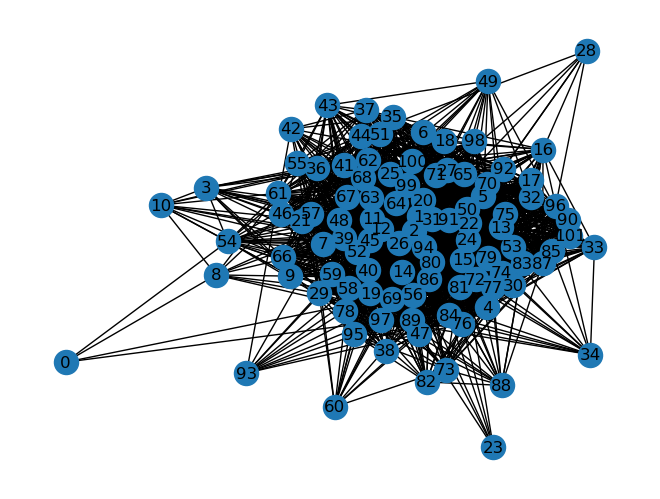

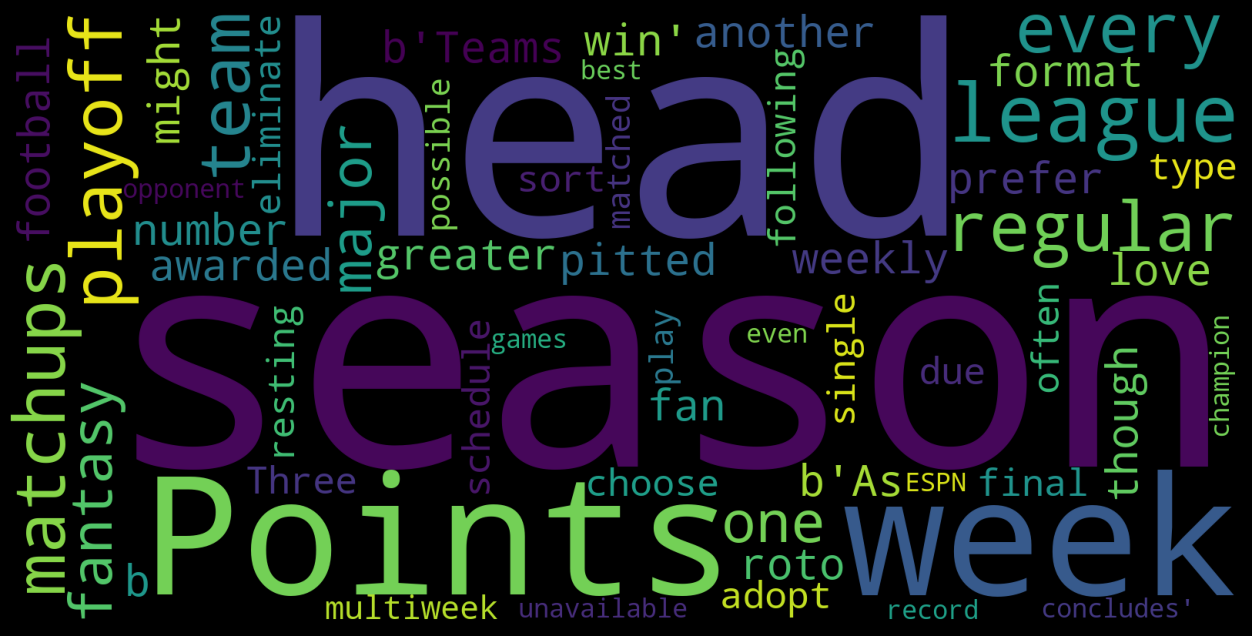

In [21]:
article_id = input("Enter the index of Article index ID for Summarization: ")
article_id=int(article_id)
print("-" * 114)
print(f"Orginal Text:\n{df['Text'][article_id]}")
print("-" * 114)
text_summary(article_id)
print("-" * 114)

# Information Extraction

Information extraction is a technique for automatically extracting particular types of information from text, such as named entities (people, organizations, and places), dates, and facts. In addition to lowering costs and reducing workload, this can also improve process efficiency and decrease error rates.

In [22]:
nlp = spacy.load("en_core_web_sm")

# Load txt file to read the summarised text
with open('/Users/sallypang/Library/CloudStorage/OneDrive-JamesCookUniversity/MA 3831/MA 3831 - Assessment02/summary.txt', 'r') as file:
    article = file.read()

doc = nlp(article)

for ent in doc.ents:
    print('{} - {}'.format(ent.text, ent.label_))
print(f"Number of Entities: {len(doc.ents)} - {doc.ents}")

weekly - DATE
the week - DATE
Three - CARDINAL
22-week regular season - DATE
21 - CARDINAL
the final week - DATE
all season - DATE
every week - DATE
ESPN - ORG
Number of Entities: 9 - (weekly, the week, Three, 22-week regular season, 21, the final week, all season, every week, ESPN)


# Discussion

A natural language processing approach called text summarizing enables users to condense enormous amounts of text into manageable bits without omitting any essential information. There is a ton of information on the internet, and it keeps growing. Text summarizing can be beneficial by offering a straightforward, informal overview of lengthy texts. Through the text summarization and information extraction, this project enables us to do so and saves us time while also allowing us to pinpoint key dates, locations, and other details. 

However, this project does have some restrictions, such as the inability to summarize texts that are not in English (referring to the example below). Besides that, as sentences are typically extracted and concatenated to one another, it is extremely common that there is no smooth transition between ideas/concepts/topics in distinct sentences. In addition, the project's performance has been proven by the ChatGPT (Generative Pre-trained Transformer), a potent tool for chatbots and other conversational AI applications. The summarizer of this model has achieved the greatest accuracy of 80. We are able to demonstrate that the output of this model has a 92 out of 100 score, which measures the quality of writing in this paper, using websites like Grammaly.

## Limitation

Enter the index of Article index ID for Summarization: 1847
------------------------------------------------------------------------------------------------------------------
Orginal Text:
ଗଣମାଧ୍ୟମରେ ଏମିତି ଅନେକ ଖବର ସାମ୍ନାକୁ ଆସିଛି, ଯିଏ ଥରେ ଦେଶ ପାଇଁ ଖେଳୁଛି ତାଙ୍କ ପାଇଁ ସରକାରୀ ଚାକିରିଟିଏ ଥୁଆ ହେଉଛି । ସେ ରାଜ୍ୟର ହେଉ ବା ଦେଶର । ସରକାରୀ ଚାକିରି ଟିଏ ଖେଳାଳିଙ୍କୁ ନିଶ୍ଚୟ ମିଳୁଛି । ଏହାଦ୍ୱାରା ଖେଳିଳଙ୍କ ମନରେ ଉତ୍ସାହ ବଢ଼ୁଛି । ଖେଳାଳିଙ୍କୁ ପ୍ରୋତ୍ସାହନ ବି ମିଳୁଛି । ଅନ୍ୟପଟେ ଏମିତି ବି ଖବର ସାମ୍ନାକୁ ଆସୁଛି ଯାହା ଶୁଣିଲେ ଏହି ମଣିଷ ଆଖିରୁ ଦୁଇ ଧାର ଲୁହ ନିଗିଡ଼ି ଯାଉଛି । ଆଉ ତାହା ହେଲା ଯିଏ ଦିନେ ଦେଶ ପାଇଁ ଖେଳୁଥିଲା, ସେ ଏବେ ଛେଳି ଚରାଉଛି । କିମ୍ବା ଦୈନନ୍ଦିନ ଜୀବନ ଅତିବାହିତ କରିବା ପାଇଁ ଦିନ ମଜୁରିଆ ଭାବେ ଖଟୁଛି । ଖାଲି ସେତିକି ନୁହେଁ ଏମିତି ବି ଖବର ସାମ୍ନାକୁ ଆସିଛି ଯେ, ଇଣ୍ଟରନାସନାଲ ଖେଳାଳି ଟାକ୍ସି ଡ୍ରାଇଭର ଭାବେ କାମ କରୁଛନ୍ତି, କ୍ଷୀର ବିକୁଛନ୍ତି କିମ୍ବା ଦୋକାନରେ କାମ କରୁଛନ୍ତି । ଆଜି ବି ଆମେ ସେମିତି କିଛି କାହାଣୀ ନେଇ ଆପଣଙ୍କ ପାଖକୁ ଆସିଛୁ । ଜଣେ ଆନ୍ତର୍ଜାତୀୟ ମହିଳା ଫୁଟ୍‌ବଲ ଖେଳାଳି ଏବେ ନିଜର ଗୁଜୁରାଣ ମେଣ୍ଟାଇବା ପାଇଁ ଜୋମାଟୋ ଗର୍ଲ ଭାବେ କାମ କରୁଛନ୍ତି । ଜୋମାଟୋ ସଂସ୍ଥାରେ ସେ ଚାକିରି କରିଛନ୍ତି । ଆଉ

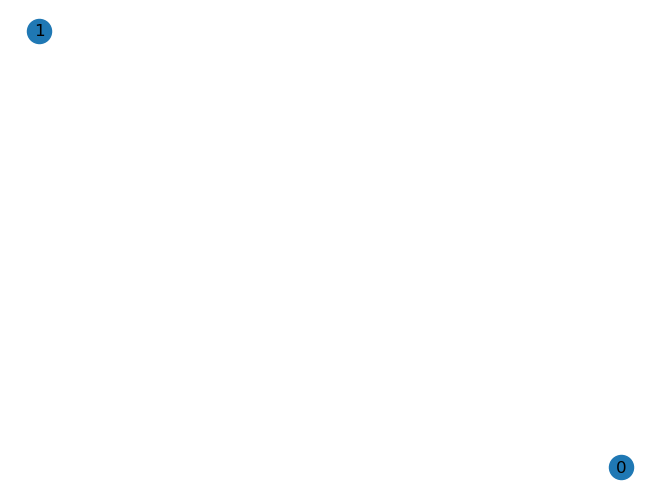

In [23]:
article_id = input("Enter the index of Article index ID for Summarization: ")
article_id=int(article_id)
print("-" * 114)
print(f"Orginal Text:\n{df['Text'][article_id]}")
print("-" * 114)
text_summary(article_id)
print("-" * 114)